In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data_finale.csv")
data.head()

C:\Users\Lynda\AppData\Local\Temp\ipykernel_17944\2462105853.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data_finale.csv")


energy_100g   fat_100g  saturated-fat_100g  carbohydrates_100g  \
0  1087.085688  13.241233            5.279283           26.957613   
1  1087.085688  13.241233            5.279283           26.957613   
2  1087.085688  13.241233            5.279283           26.957613   
3  1087.085688  13.241233            5.279283           26.957613   
4   177.000000   0.000000            0.000000           10.400000   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0    12.510905    5.157427       9.928305   0.875458      0.34467   
1    12.510905    3.371664       5.402290   0.875458      0.34467   
2    12.510905    3.371664       5.402290   0.875458      0.34467   
3    12.510905    0.579941       0.845284   0.875458      0.34467   
4    10.400000    0.000000       0.000000   0.025400      0.01000   

   nutrition-score-fr_100g                           product_name      code  \
0                 1.247373                      lentilles vertes    5200016   
1                17.426749      Biscuits sablés fourrage au cacao   7730009   
2                17.426749                                    NaN   9336247   
3                 8.145586  Thé de Noël aromatisé orange-cannelle  10090206   
4                13.000000                  Pepsi, Nouveau goût !  40608754   

                          product_name.1  additives_n  \
0                      lentilles vertes           0.0   
1      Biscuits sablés fourrage au cacao          3.0   
2                                    NaN          0.0   
3  Thé de Noël aromatisé orange-cannelle          0.0   
4                  Pepsi, Nouveau goût !          2.0   

   ingredients_from_palm_oil_n nutrition_grade_fr         pnns_groups_1  \
0                          0.0                NaN  Cereals and potatoes   
1                          0.0                NaN         Sugary snacks   
2                          0.0                NaN         Sugary snacks   
3                          0.0                NaN             Beverages   
4                          0.0                  e             Beverages   

           pnns_groups_2  
0                Legumes  
1     Biscuits and cakes  
2                 Sweets  
3  Non-sugared beverages  
4    Sweetened beverages

In [3]:
data.shape

(48796, 18)

### Analyse exploratoire

- I- Analyse univariée :

In [4]:
data.describe()

energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g  \
count  48796.000000  48796.000000        48796.000000        48796.000000   
mean    1104.107408     13.542510            5.378621           27.017487   
std      714.244848     15.500936            7.439502           24.260601   
min        0.000000      0.000000            0.000000            0.000000   
25%      512.000000      2.000000            0.500000            6.000000   
50%     1087.085688     12.277739            3.500000           26.000000   
75%     1518.000000     17.300000            5.404422           43.000000   
max     4377.014179    100.000000          100.000000          100.000000   

        sugars_100g    fiber_100g  proteins_100g     salt_100g   sodium_100g  \
count  48796.000000  48796.000000   48796.000000  48796.000000  48796.000000   
mean      12.543500      2.234925       7.767442      0.886086      0.348854   
std       16.297473      2.843880       7.203001      1.278268      0.503292   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        1.500000      0.579941       1.876111      0.127000      0.050000   
50%        7.700000      1.400000       6.000000      0.875458      0.344670   
75%       12.510905      3.371664      10.800000      1.000000      0.393701   
max      100.000000     86.200000      86.000000     74.000000     29.133858   

       nutrition-score-fr_100g   additives_n  ingredients_from_palm_oil_n  
count             48796.000000  48796.000000                 48796.000000  
mean                  8.305565      1.657369                     0.057054  
std                   8.447630      2.513717                     0.235630  
min                 -15.000000      0.000000                     0.000000  
25%                   1.247373      0.000000                     0.000000  
50%                   8.494970      0.000000                     0.000000  
75%                  14.000000      2.000000                     0.000000  
max                  40.000000     31.000000                     2.000000

In [5]:
data.select_dtypes('float').columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'additives_n',
       'ingredients_from_palm_oil_n'],
      dtype='object')

In [6]:
data.select_dtypes('object').columns

Index(['product_name', 'code', 'product_name.1', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2'],
      dtype='object')

### Variable numerique

Text(0.5, 1.0, 'Nutrition score')

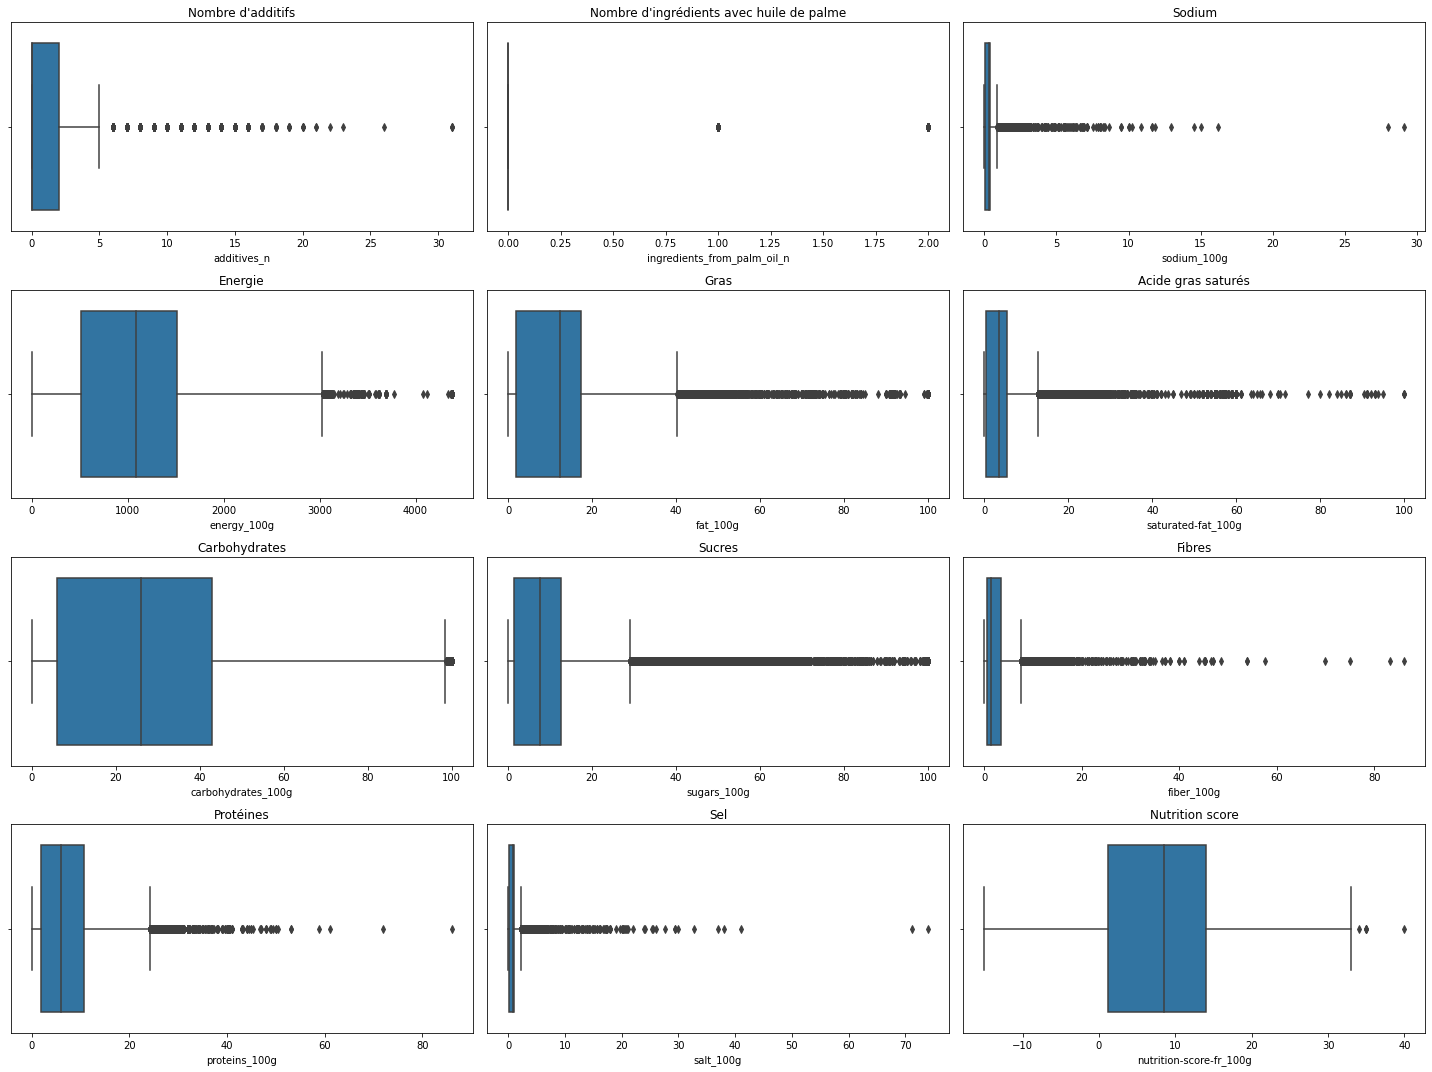

In [7]:
fig,axs=plt.subplots(4,3,tight_layout=True,figsize=(20,15))
sns.boxplot(ax=axs[0,0],x=data['additives_n'])
axs[0,0].set_title("Nombre d'additifs")
sns.boxplot(ax=axs[0,1],x=data['ingredients_from_palm_oil_n'])
axs[0,1].set_title("Nombre d'ingrédients avec huile de palme")
sns.boxplot(ax=axs[0,2],x=data['sodium_100g'])
axs[0,2].set_title("Sodium")
sns.boxplot(ax=axs[1,0],x=data['energy_100g'])
axs[1,0].set_title("Energie")
sns.boxplot(ax=axs[1,1],x=data['fat_100g'])
axs[1,1].set_title("Gras")
sns.boxplot(ax=axs[1,2],x=data['saturated-fat_100g'])
axs[1,2].set_title("Acide gras saturés")
sns.boxplot(ax=axs[2,0],x=data['carbohydrates_100g'])
axs[2,0].set_title("Carbohydrates")
sns.boxplot(ax=axs[2,1],x=data['sugars_100g'])
axs[2,1].set_title("Sucres")
sns.boxplot(ax=axs[2,2],x=data['fiber_100g'])
axs[2,2].set_title("Fibres")
sns.boxplot(ax=axs[3,0],x=data['proteins_100g'])
axs[3,0].set_title("Protéines")
sns.boxplot(ax=axs[3,1],x=data['salt_100g'])
axs[3,1].set_title("Sel")
sns.boxplot(ax=axs[3,2],x=data['nutrition-score-fr_100g'])
axs[3,2].set_title("Nutrition score")

c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0.5, 1.0, 'Nutrition score')

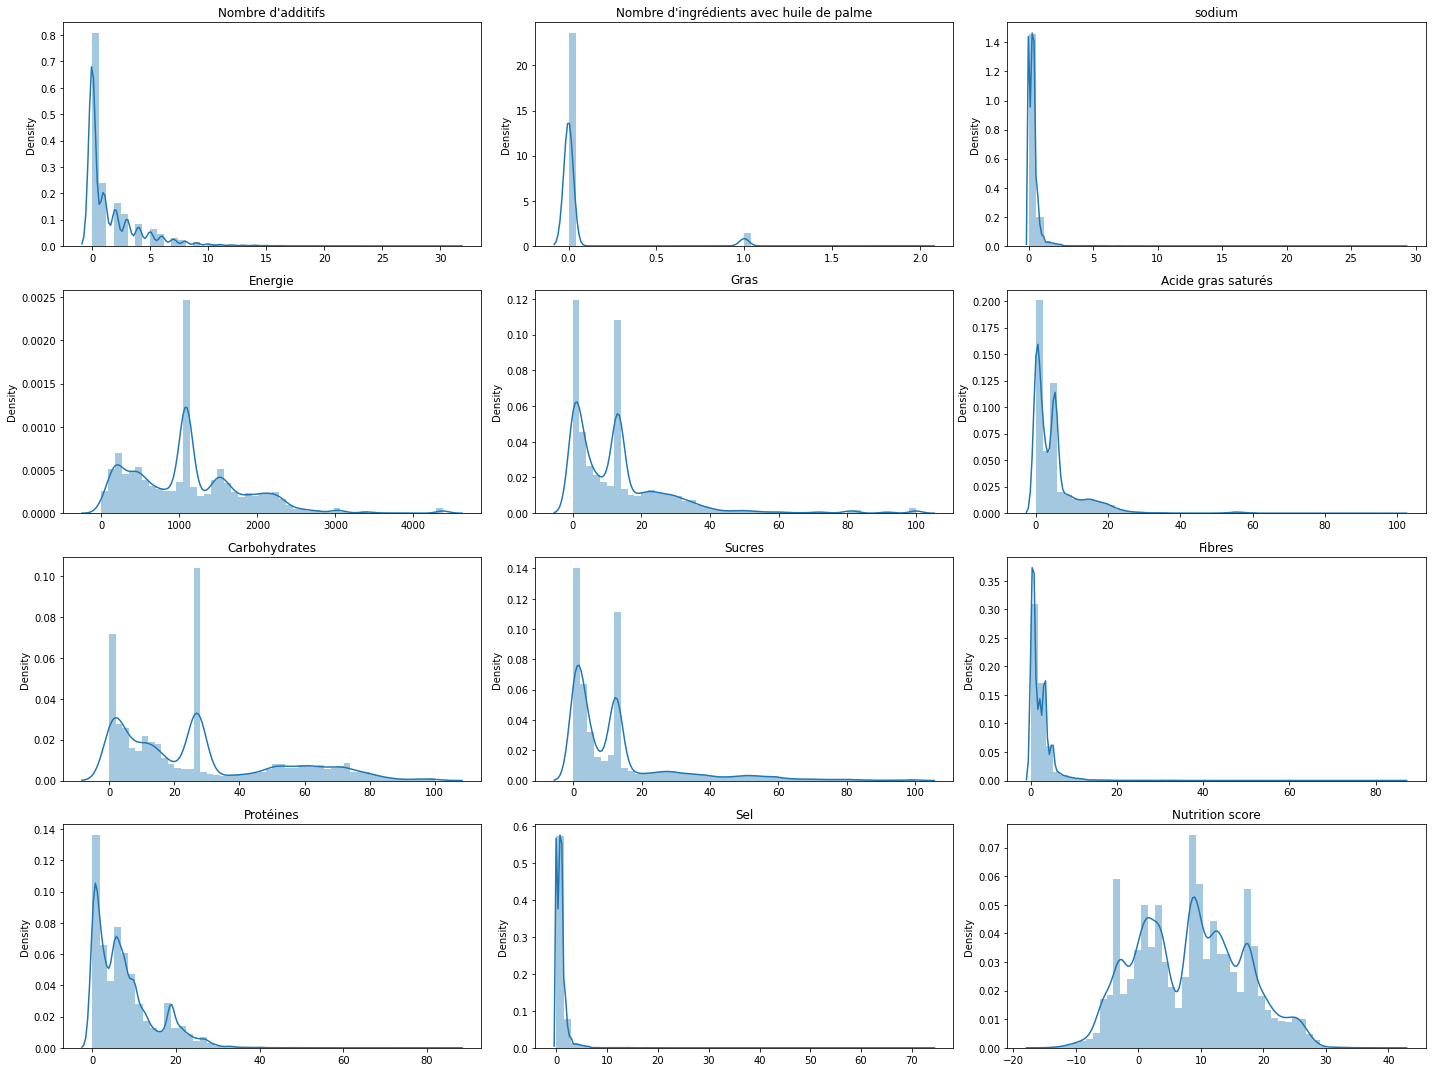

In [8]:
fig,axs=plt.subplots(4,3,tight_layout=True,figsize=(20,15))
sns.distplot(ax=axs[0,0],x=data['additives_n'])
axs[0,0].set_title("Nombre d'additifs")
sns.distplot(ax=axs[0,1],x=data['ingredients_from_palm_oil_n'])
axs[0,1].set_title("Nombre d'ingrédients avec huile de palme")
sns.distplot(ax=axs[0,2],x=data['sodium_100g'])
axs[0,2].set_title("sodium")
sns.distplot(ax=axs[1,0],x=data['energy_100g'])
axs[1,0].set_title("Energie")
sns.distplot(ax=axs[1,1],x=data['fat_100g'])
axs[1,1].set_title("Gras")
sns.distplot(ax=axs[1,2],x=data['saturated-fat_100g'])
axs[1,2].set_title("Acide gras saturés")
sns.distplot(ax=axs[2,0],x=data['carbohydrates_100g'])
axs[2,0].set_title("Carbohydrates")
sns.distplot(ax=axs[2,1],x=data['sugars_100g'])
axs[2,1].set_title("Sucres")
sns.distplot(ax=axs[2,2],x=data['fiber_100g'])
axs[2,2].set_title("Fibres")
sns.distplot(ax=axs[3,0],x=data['proteins_100g'])
axs[3,0].set_title("Protéines")
sns.distplot(ax=axs[3,1],x=data['salt_100g'])
axs[3,1].set_title("Sel")
sns.distplot(ax=axs[3,2],x=data['nutrition-score-fr_100g'])
axs[3,2].set_title("Nutrition score")

### Variable catégoriels:

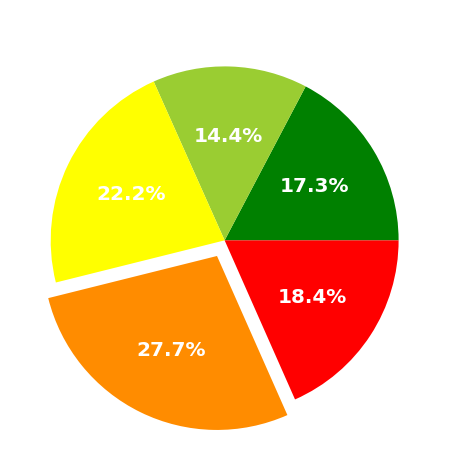

In [9]:
nutrigrades = data.groupby(by='nutrition_grade_fr')['product_name'].nunique().sort_values(ascending=False).sort_index()
fig, ax = plt.subplots(figsize=(8, 8))

explodes = np.zeros(5)
explodes[3] = .1
plt.pie(nutrigrades, 
        labels=nutrigrades.index,
        colors=['green','yellowgreen','yellow','darkorange','red'],
        startangle=0,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="white",size=20, weight="bold"))
plt.title("Répartition des Nutrition_grades",color="white")
plt.show()

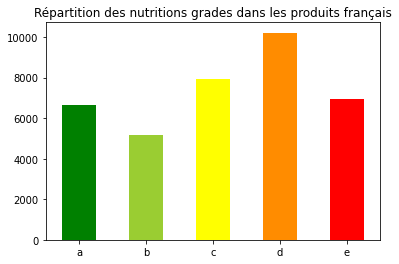

In [10]:
data['nutrition_grade_fr'].value_counts().sort_index().plot(kind='bar',color=['green','yellowgreen','yellow','darkorange','red'])
plt.xticks(rotation=0)
plt.title('Répartition des nutritions grades dans les produits français')
plt.show()

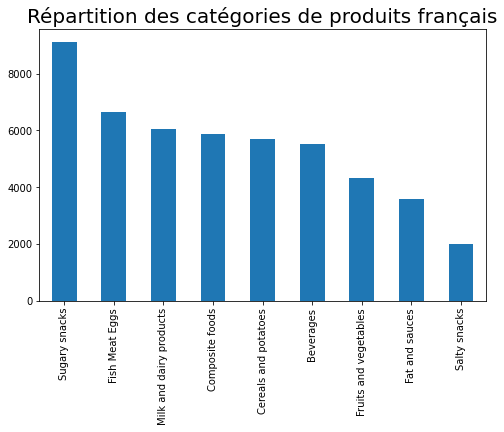

In [11]:
plt.figure(figsize=(8,5))
data['pnns_groups_1'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Répartition des catégories de produits français',fontsize=20)
plt.show()

## Analyse bivariée

<AxesSubplot:>

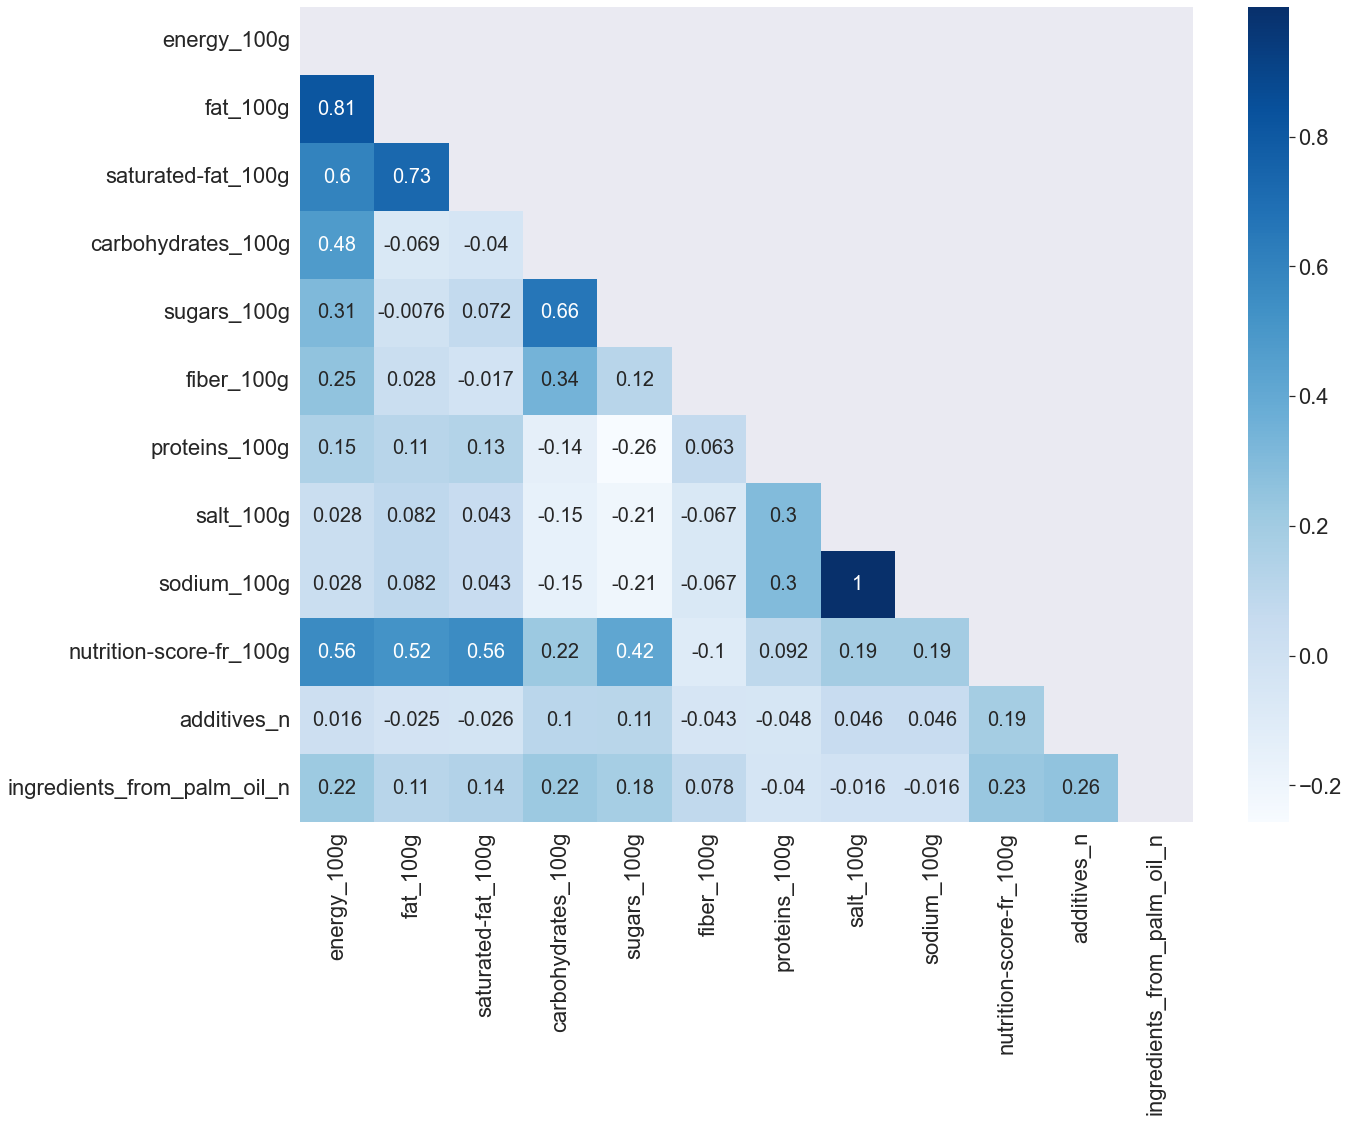

In [12]:
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(data.corr(),dtype=bool)) ## masque qui supprime la partie supérieure carré
sns.set(font_scale=2)
sns.heatmap(data.corr(),mask=mask,cbar= True,annot=True,annot_kws={"size": 20},cmap='Blues')

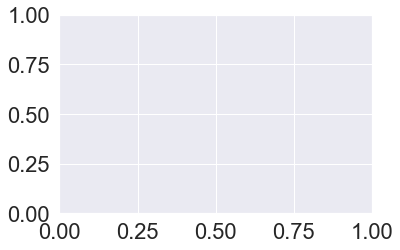

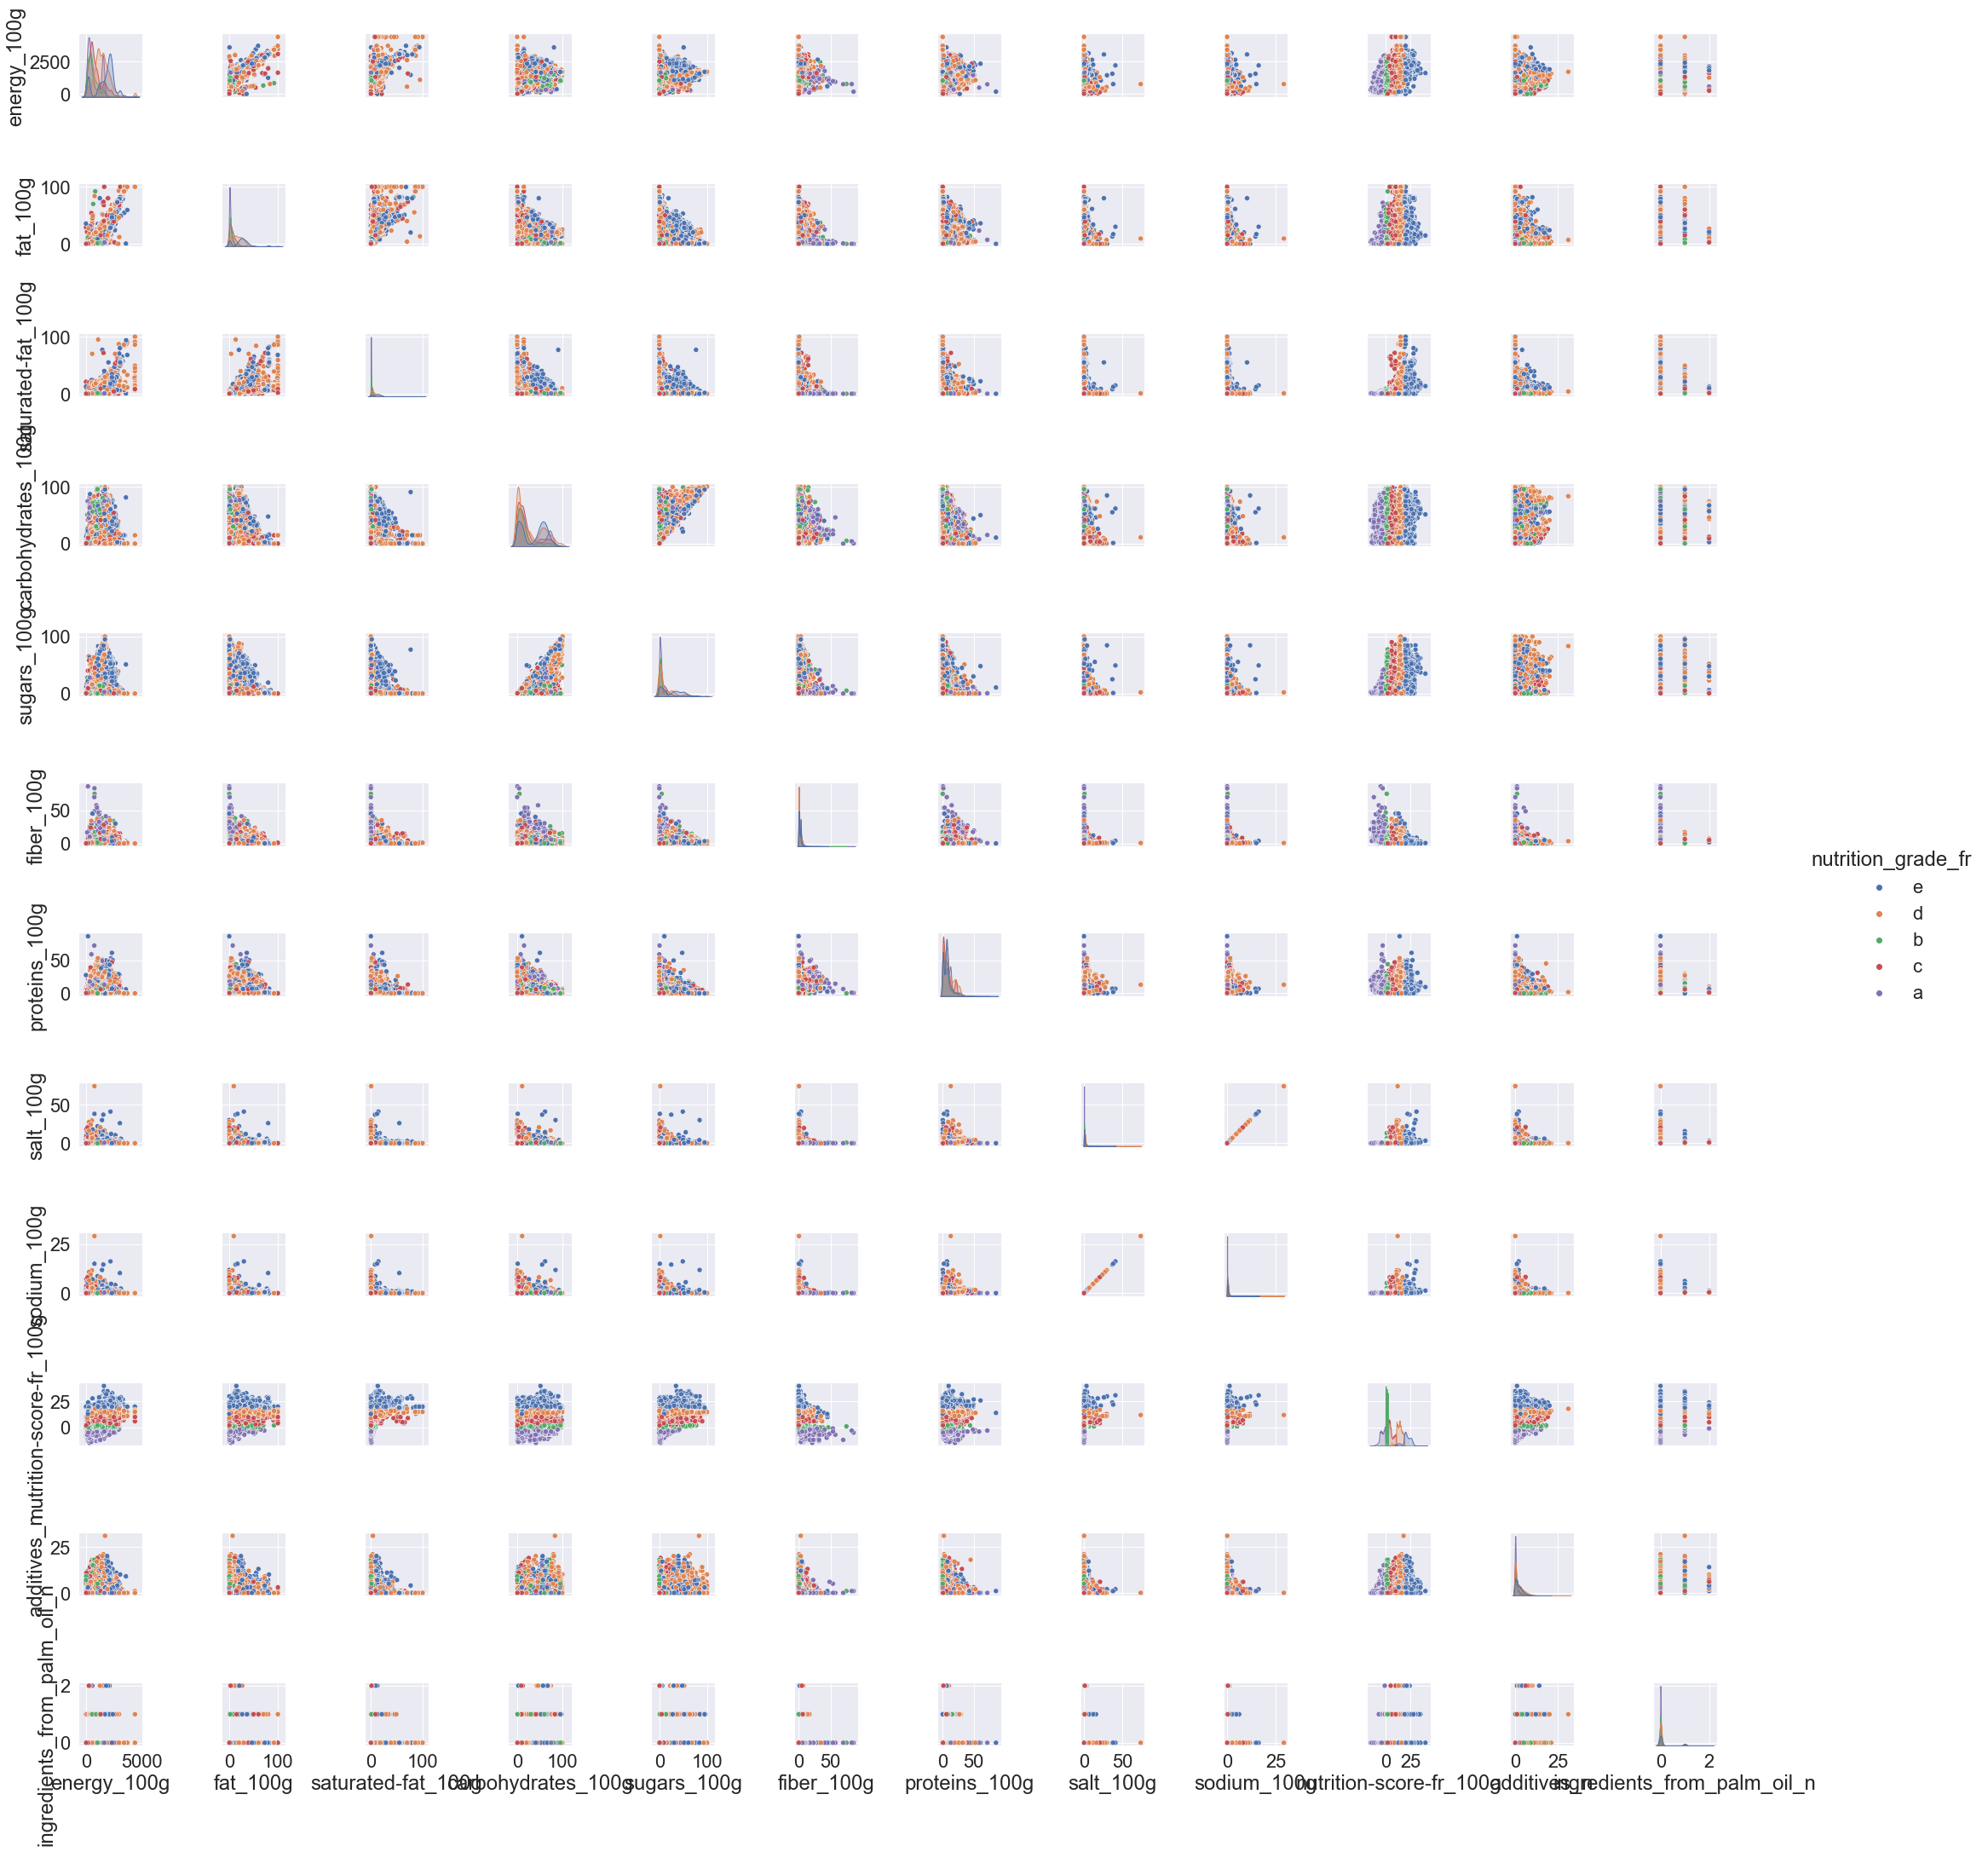

In [13]:
fig,ax= plt.subplots(tight_layout= True)
sns.pairplot(data,hue='nutrition_grade_fr')
plt.show()

Text(0.5, 1.0, 'Nutrition score')

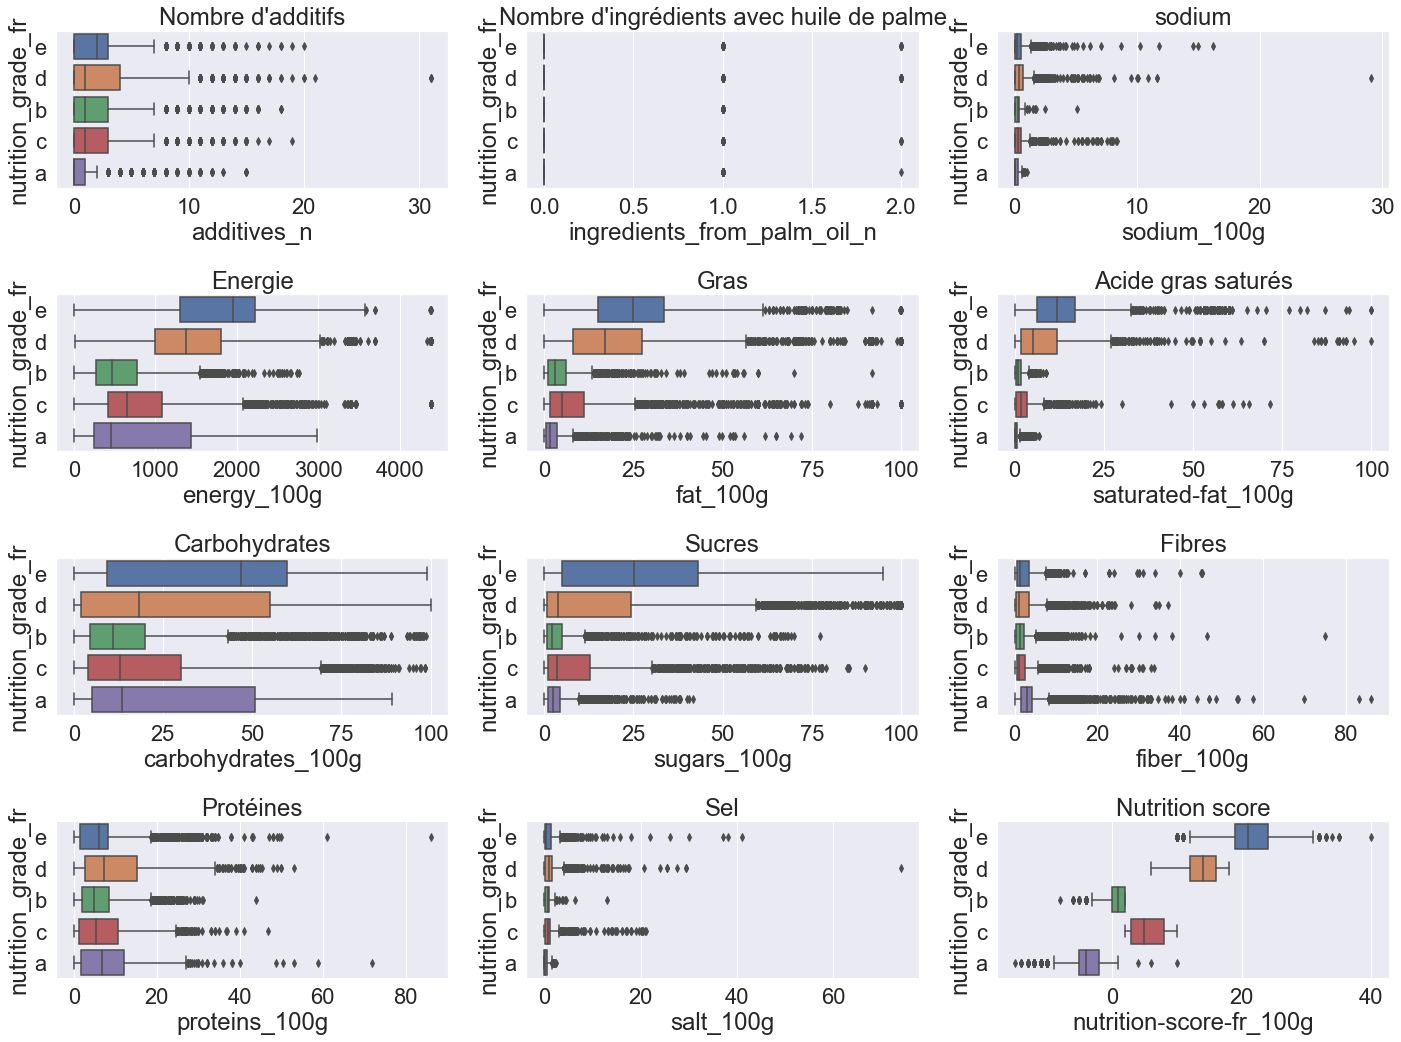

In [14]:
fig,axs=plt.subplots(4,3,tight_layout=True,figsize=(20,15))
sns.boxplot(ax=axs[0,0],data=data,x=data['additives_n'],y=data['nutrition_grade_fr'])
axs[0,0].set_title("Nombre d'additifs")
sns.boxplot(ax=axs[0,1],data=data,x=data['ingredients_from_palm_oil_n'],y=data['nutrition_grade_fr'])
axs[0,1].set_title("Nombre d'ingrédients avec huile de palme")
sns.boxplot(ax=axs[0,2],data=data,x=data['sodium_100g'],y=data['nutrition_grade_fr'])
axs[0,2].set_title("sodium")
sns.boxplot(ax=axs[1,0],data=data,x=data['energy_100g'],y=data['nutrition_grade_fr'])
axs[1,0].set_title("Energie")
sns.boxplot(ax=axs[1,1],data=data,x=data['fat_100g'],y=data['nutrition_grade_fr'])
axs[1,1].set_title("Gras")
sns.boxplot(ax=axs[1,2],data=data,x=data['saturated-fat_100g'],y=data['nutrition_grade_fr'])
axs[1,2].set_title("Acide gras saturés")
sns.boxplot(ax=axs[2,0],data=data,x=data['carbohydrates_100g'],y=data['nutrition_grade_fr'])
axs[2,0].set_title("Carbohydrates")
sns.boxplot(ax=axs[2,1],data=data,x=data['sugars_100g'],y=data['nutrition_grade_fr'])
axs[2,1].set_title("Sucres")
sns.boxplot(ax=axs[2,2],data=data,x=data['fiber_100g'],y=data['nutrition_grade_fr'])
axs[2,2].set_title("Fibres")
sns.boxplot(ax=axs[3,0],data=data,x=data['proteins_100g'],y=data['nutrition_grade_fr'])
axs[3,0].set_title("Protéines")
sns.boxplot(ax=axs[3,1],data=data,x=data['salt_100g'],y=data['nutrition_grade_fr'])
axs[3,1].set_title("Sel")
sns.boxplot(ax=axs[3,2],data=data,x=data['nutrition-score-fr_100g'],y=data['nutrition_grade_fr'])
axs[3,2].set_title("Nutrition score")

#### Analyse bivarie avec un eechantillon de 5000 

In [15]:
data1=data.sample(n=5000,random_state=0)
data1

energy_100g   fat_100g  saturated-fat_100g  carbohydrates_100g  \
24283   728.000000   7.500000            0.600000           19.000000   
34358  1234.000000   5.300000            0.600000           53.200000   
32132   360.000000   0.500000            0.100000           12.000000   
47330  1078.000000  21.500000           15.000000            0.500000   
17806  1548.000000  14.600000            3.800000           51.200000   
...            ...        ...                 ...                 ...   
36025  1087.085688  13.241233            5.279283           26.957613   
42497  1031.000000   1.300000            1.280000           95.310000   
20418  1855.000000  14.500000           10.700000           70.700000   
38606   530.000000   5.700000            3.900000           15.700000   
47229  2133.000000  26.000000           16.000000           60.000000   

       sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
24283     3.300000    2.091754       6.100000   1.079500     0.425000   
34358     6.900000    2.100000       7.600000   1.140000     0.448819   
32132     0.500000    3.800000       6.300000   0.580000     0.228346   
47330     0.500000    0.401396      16.100000   1.000760     0.394000   
17806    15.300000    1.900000       8.400000   1.041400     0.410000   
...            ...         ...            ...        ...          ...   
36025    12.510905    0.579941       0.845284   0.875458     0.344670   
42497     0.100000    1.470000       0.004000   0.001000     0.000394   
20418    38.100000    3.300000       5.300000   0.130000     0.051181   
38606    13.800000    0.600000       2.800000   0.101600     0.040000   
47229    50.000000    2.100000       7.900000   0.762000     0.300000   

       nutrition-score-fr_100g  \
24283                 3.000000   
34358                 2.000000   
32132                -5.000000   
47330                12.000000   
17806                12.000000   
...                        ...   
36025                 8.145586   
42497                 2.000000   
20418                19.000000   
38606                 6.000000   
47229                27.000000   

                                           product_name           code  \
24283          mon Taboulé aux Crevettes Recette Marine  3281780873597   
34358                                    Canapés Nature  3564700282434   
32132                                         Lentilles  3560070329472   
47330              Saint Marcellin IGP (21,5% MG) 240 g  8480017039088   
17806                       Briochettes rondes Pasquier  3256540010406   
...                                                 ...            ...   
36025                                            Keemun  3582810240328   
42497                                       Miel-Citron  5000357106108   
20418       Tartelette framboise à la farine d'épeautre  3263852922815   
38606                   Douceur laitière, Fameuh Marron  3661344000124   
47229  Chocolat au lait aux céréales croustillantes Dia  8480017002198   

                                         product_name.1  additives_n  \
24283          mon Taboulé aux Crevettes Recette Marine          2.0   
34358                                    Canapés Nature          4.0   
32132                                         Lentilles          0.0   
47330              Saint Marcellin IGP (21,5% MG) 240 g          0.0   
17806                       Briochettes rondes Pasquier          3.0   
...                                                 ...          ...   
36025                                            Keemun          0.0   
42497                                       Miel-Citron          5.0   
20418       Tartelette framboise à la farine d'épeautre          5.0   
38606                   Douceur laitière, Fameuh Marron          0.0   
47229  Chocolat au lait aux céréales croustillantes Dia          1.0   

       ingredients_from_palm_oil_n nutrition_grade_fr  \
24283                          0.

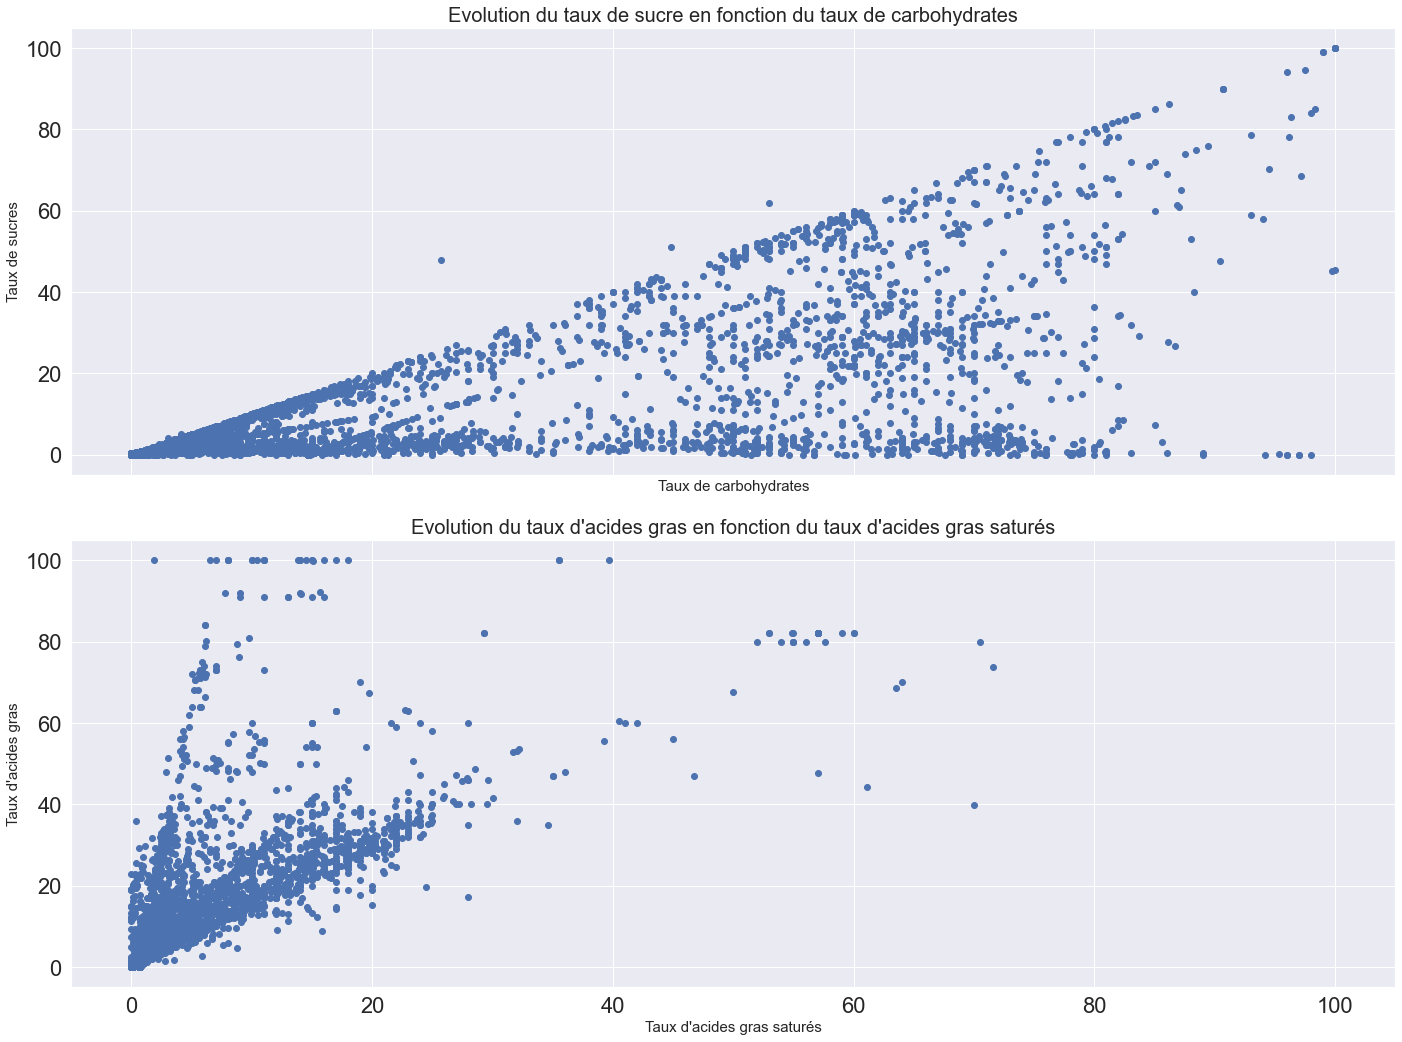

In [16]:
fig,ax= plt.subplots(2,1,figsize=(20,15),tight_layout=True,sharex=True)
ax[0].scatter(data1['carbohydrates_100g'],data1['sugars_100g'])
ax[0].set_xlabel('Taux de carbohydrates',fontsize=15)
ax[0].set_ylabel('Taux de sucres',fontsize=15)
ax[0].set_title("Evolution du taux de sucre en fonction du taux de carbohydrates",fontsize=20)
ax[1].scatter(data1['saturated-fat_100g'],data1['fat_100g'])
ax[1].set_xlabel("Taux d'acides gras saturés",fontsize=15)
ax[1].set_ylabel("Taux d'acides gras",fontsize=15)
ax[1].set_title("Evolution du taux d'acides gras en fonction du taux d'acides gras saturés",fontsize=20)
plt.show()

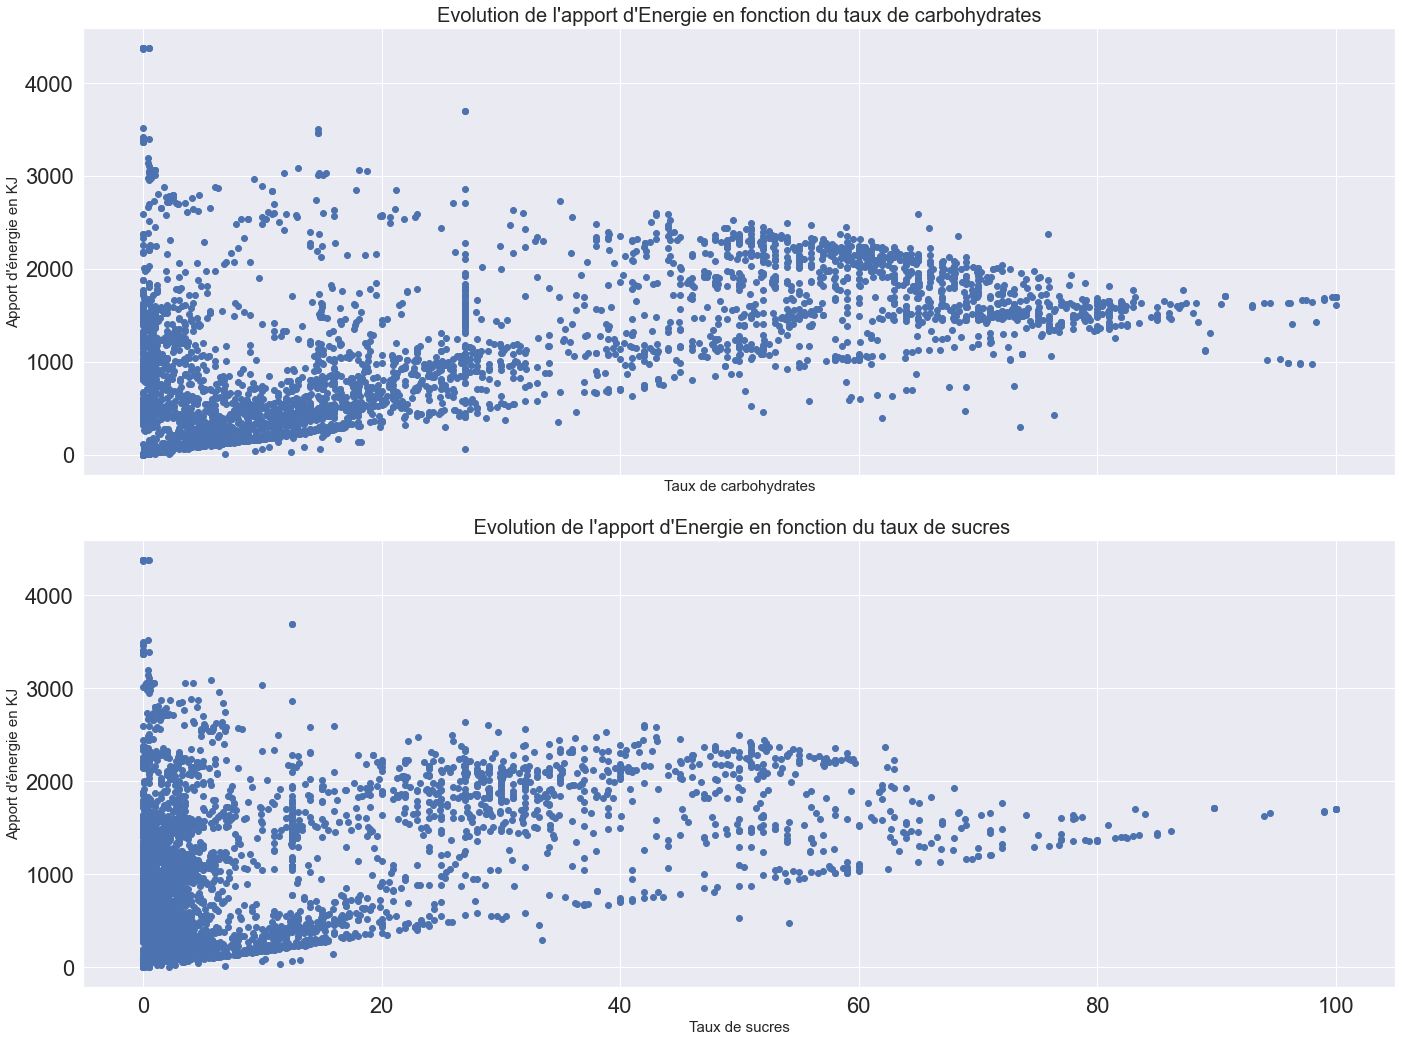

In [17]:
fig,ax= plt.subplots(2,1,figsize=(20,15),tight_layout=True,sharex=True)
ax[0].scatter(data1['carbohydrates_100g'],data1['energy_100g'])
ax[0].set_xlabel('Taux de carbohydrates',fontsize=15)
ax[0].set_ylabel("Apport d'énergie en KJ",fontsize=15)
ax[0].set_title("Evolution de l'apport d'Energie en fonction du taux de carbohydrates",fontsize=20)
ax[1].scatter(data1['sugars_100g'],data1['energy_100g'])
ax[1].set_xlabel("Taux de sucres",fontsize=15)
ax[1].set_ylabel("Apport d'énergie en KJ",fontsize=15)
ax[1].set_title(" Evolution de l'apport d'Energie en fonction du taux de sucres",fontsize=20)
plt.show()

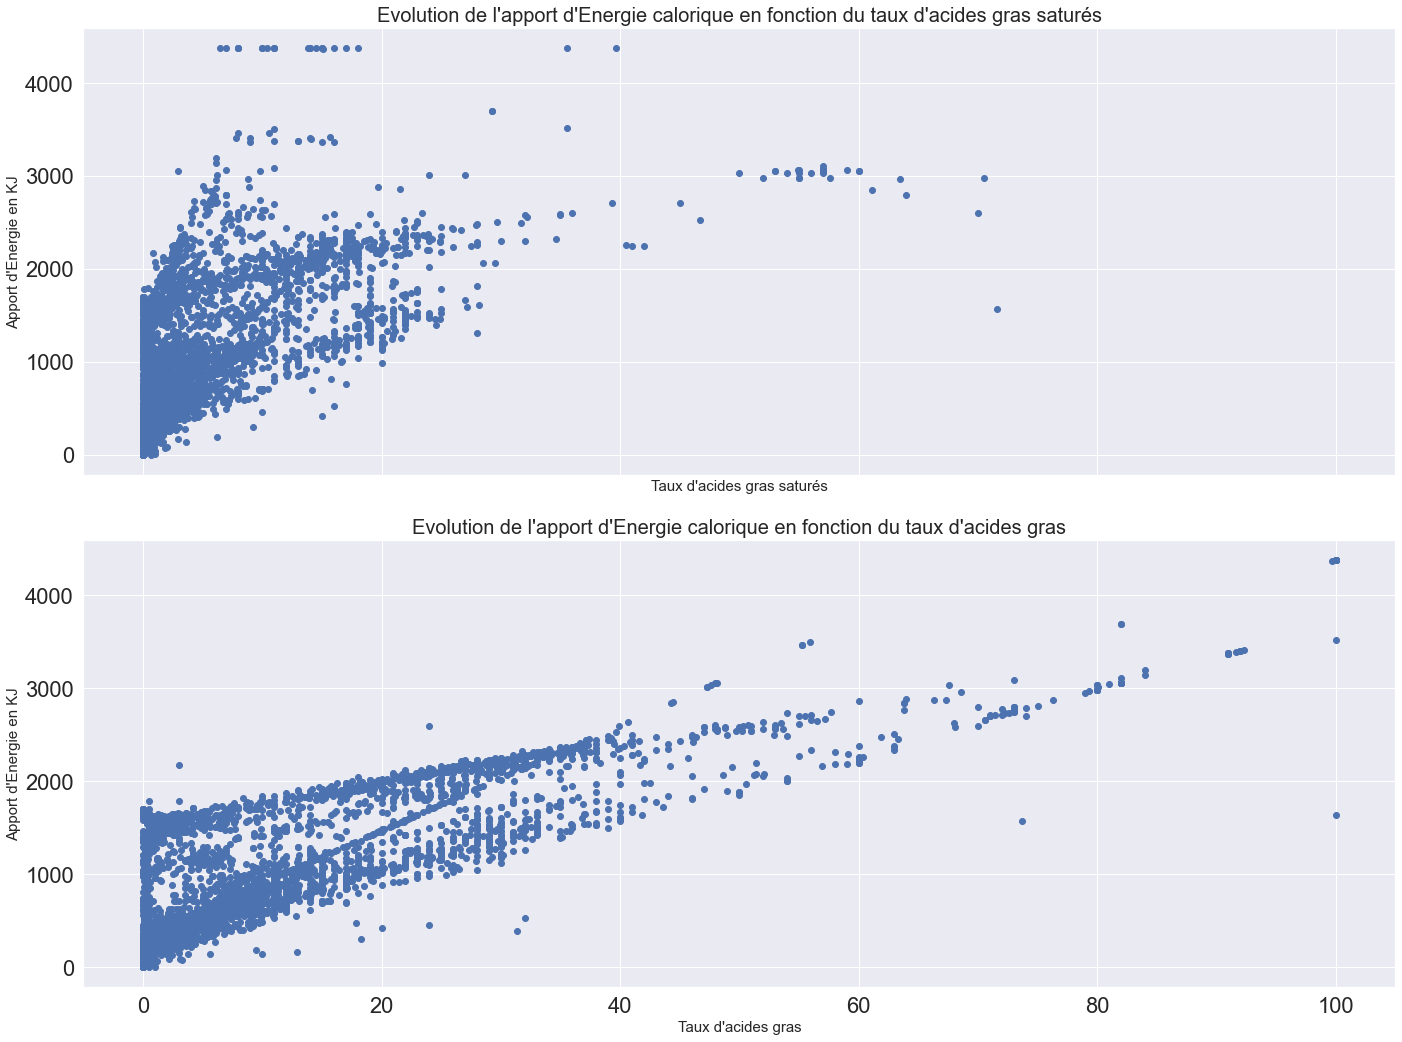

In [18]:
fig,ax= plt.subplots(2,1,figsize=(20,15),tight_layout=True,sharex=True)
ax[0].scatter(data1['saturated-fat_100g'],data1['energy_100g'])
ax[0].set_xlabel("Taux d'acides gras saturés",fontsize=15)
ax[0].set_ylabel("Apport d'Energie en KJ",fontsize=15)
ax[0].set_title("Evolution de l'apport d'Energie calorique en fonction du taux d'acides gras saturés",fontsize=20)
ax[1].scatter(data1['fat_100g'],data1['energy_100g'])
ax[1].set_xlabel("Taux d'acides gras",fontsize=15)
ax[1].set_ylabel("Apport d'Energie en KJ",fontsize=15)
ax[1].set_title("Evolution de l'apport d'Energie calorique en fonction du taux d'acides gras",fontsize=20)
plt.show()

#### Test de Pearson:

* On va verifier si y'on a une relation (corrélation) entre les nutriments...

In [19]:
# test pearson
from scipy import stats
x = data1['fat_100g']
y = data1['energy_100g']
stats.pearsonr(x, y)

(0.8124291273802866, 0.0)

* P value est a 81.67% donc y'a une correlation tres importante

<AxesSubplot:xlabel='fat_100g', ylabel='nutrition-score-fr_100g'>

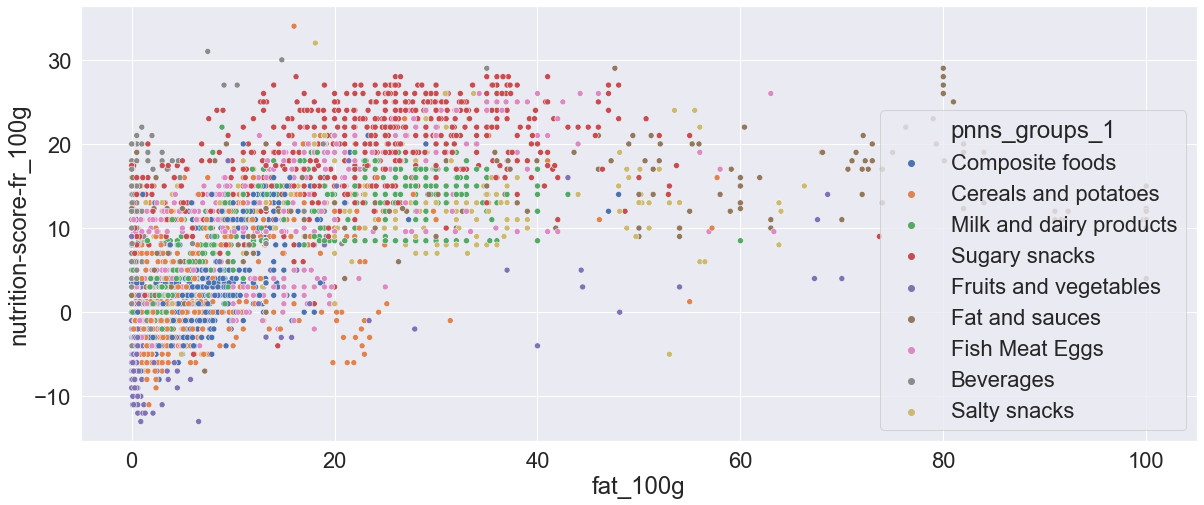

In [20]:
plt.figure(figsize=(20,8))
sns.scatterplot(data = data1 , x= 'fat_100g' , y = 'nutrition-score-fr_100g',hue = 'pnns_groups_1')


<AxesSubplot:xlabel='sugars_100g', ylabel='nutrition-score-fr_100g'>

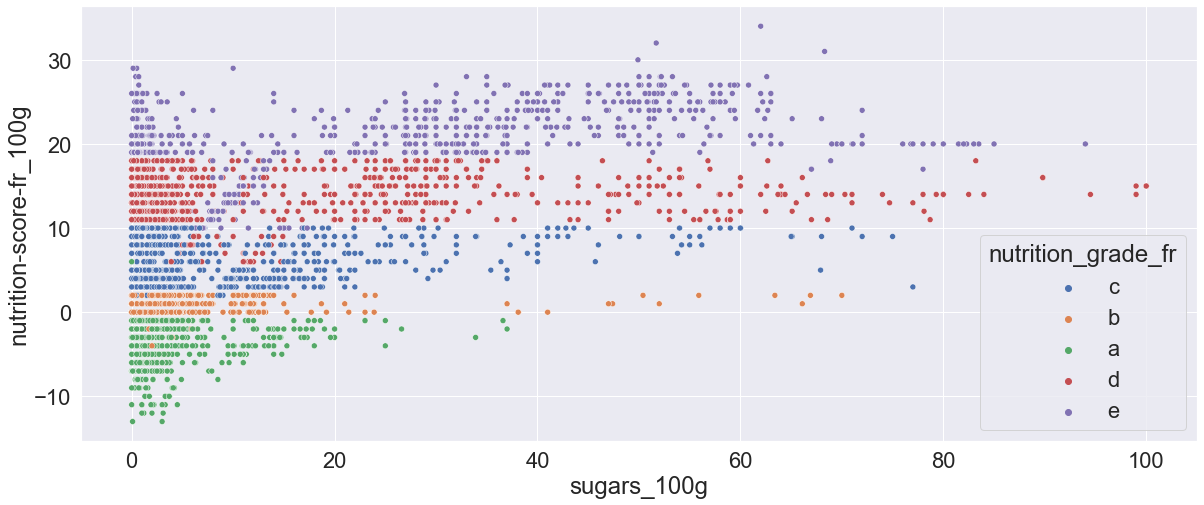

In [21]:
plt.figure(figsize=(20,8))
sns.scatterplot(data = data1 , x= 'sugars_100g' , y = 'nutrition-score-fr_100g',hue = 'nutrition_grade_fr')


<AxesSubplot:xlabel='fat_100g', ylabel='nutrition-score-fr_100g'>

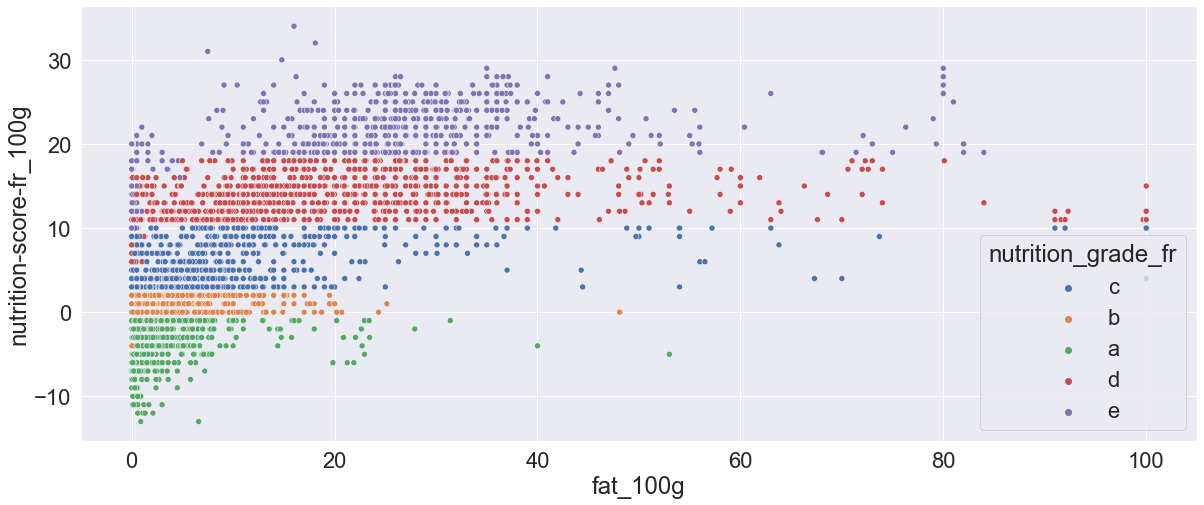

In [22]:
plt.figure(figsize=(20,8))
sns.scatterplot(data = data1 , x= 'fat_100g' , y = 'nutrition-score-fr_100g',hue = 'nutrition_grade_fr')


* On vois que y'a plusiers groupe qui se forme en fonction de nutriscore grade.

pour un nutrigrade a on trouve le sucre entre 0 et 20g et le nutri-score de valeur trés faible entre -10 et 0 .

* d'apres le nuage de point on vois que plus le sucre augmente plus on obtient des groupe de nutriscore avec des valeurs trés importatnte de nutriscore cas de nutriscore e


Text(0.5, 1.0, 'Nutrition score')

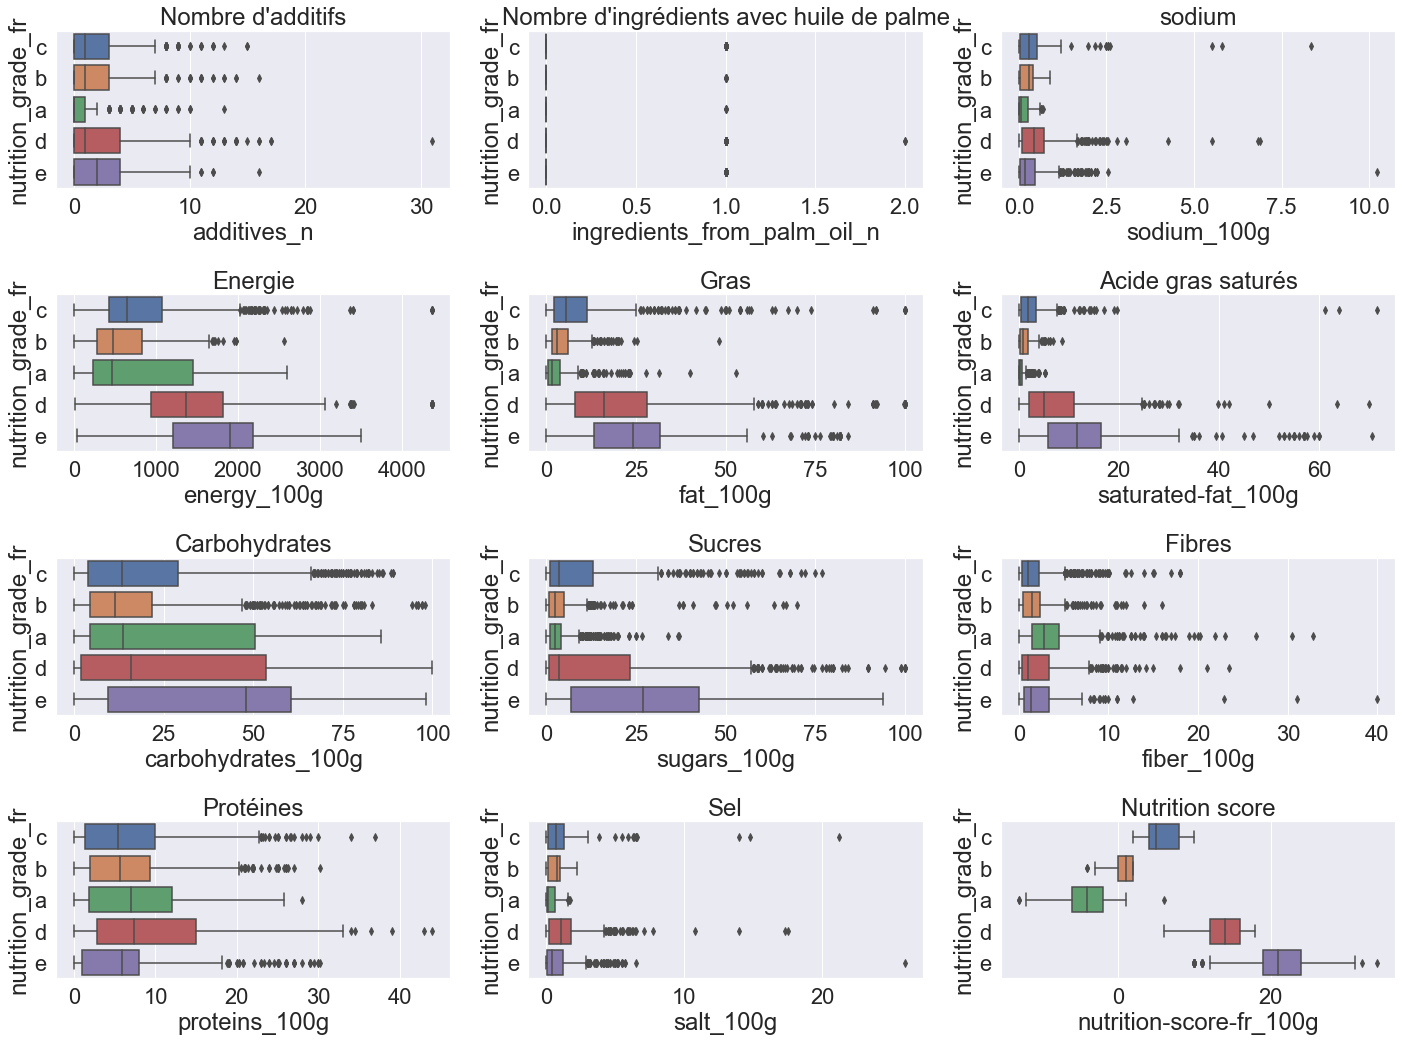

In [23]:
fig,axs=plt.subplots(4,3,tight_layout=True,figsize=(20,15))
sns.boxplot(ax=axs[0,0],data=data1,x=data1['additives_n'],y=data1['nutrition_grade_fr'])
axs[0,0].set_title("Nombre d'additifs")
sns.boxplot(ax=axs[0,1],data=data1,x=data1['ingredients_from_palm_oil_n'],y=data1['nutrition_grade_fr'])
axs[0,1].set_title("Nombre d'ingrédients avec huile de palme")
sns.boxplot(ax=axs[0,2],data=data1,x=data1['sodium_100g'],y=data1['nutrition_grade_fr'])
axs[0,2].set_title("sodium")
sns.boxplot(ax=axs[1,0],data=data1,x=data1['energy_100g'],y=data1['nutrition_grade_fr'])
axs[1,0].set_title("Energie")
sns.boxplot(ax=axs[1,1],data=data1,x=data1['fat_100g'],y=data1['nutrition_grade_fr'])
axs[1,1].set_title("Gras")
sns.boxplot(ax=axs[1,2],data=data1,x=data1['saturated-fat_100g'],y=data1['nutrition_grade_fr'])
axs[1,2].set_title("Acide gras saturés")
sns.boxplot(ax=axs[2,0],data=data1,x=data1['carbohydrates_100g'],y=data1['nutrition_grade_fr'])
axs[2,0].set_title("Carbohydrates")
sns.boxplot(ax=axs[2,1],data=data1,x=data1['sugars_100g'],y=data1['nutrition_grade_fr'])
axs[2,1].set_title("Sucres")
sns.boxplot(ax=axs[2,2],data=data1,x=data1['fiber_100g'],y=data1['nutrition_grade_fr'])
axs[2,2].set_title("Fibres")
sns.boxplot(ax=axs[3,0],data=data1,x=data1['proteins_100g'],y=data1['nutrition_grade_fr'])
axs[3,0].set_title("Protéines")
sns.boxplot(ax=axs[3,1],data=data1,x=data1['salt_100g'],y=data1['nutrition_grade_fr'])
axs[3,1].set_title("Sel")
sns.boxplot(ax=axs[3,2],data=data1,x=data1['nutrition-score-fr_100g'],y=data1['nutrition_grade_fr'])
axs[3,2].set_title("Nutrition score")

Text(0.5, 1.0, 'Nutrition score')

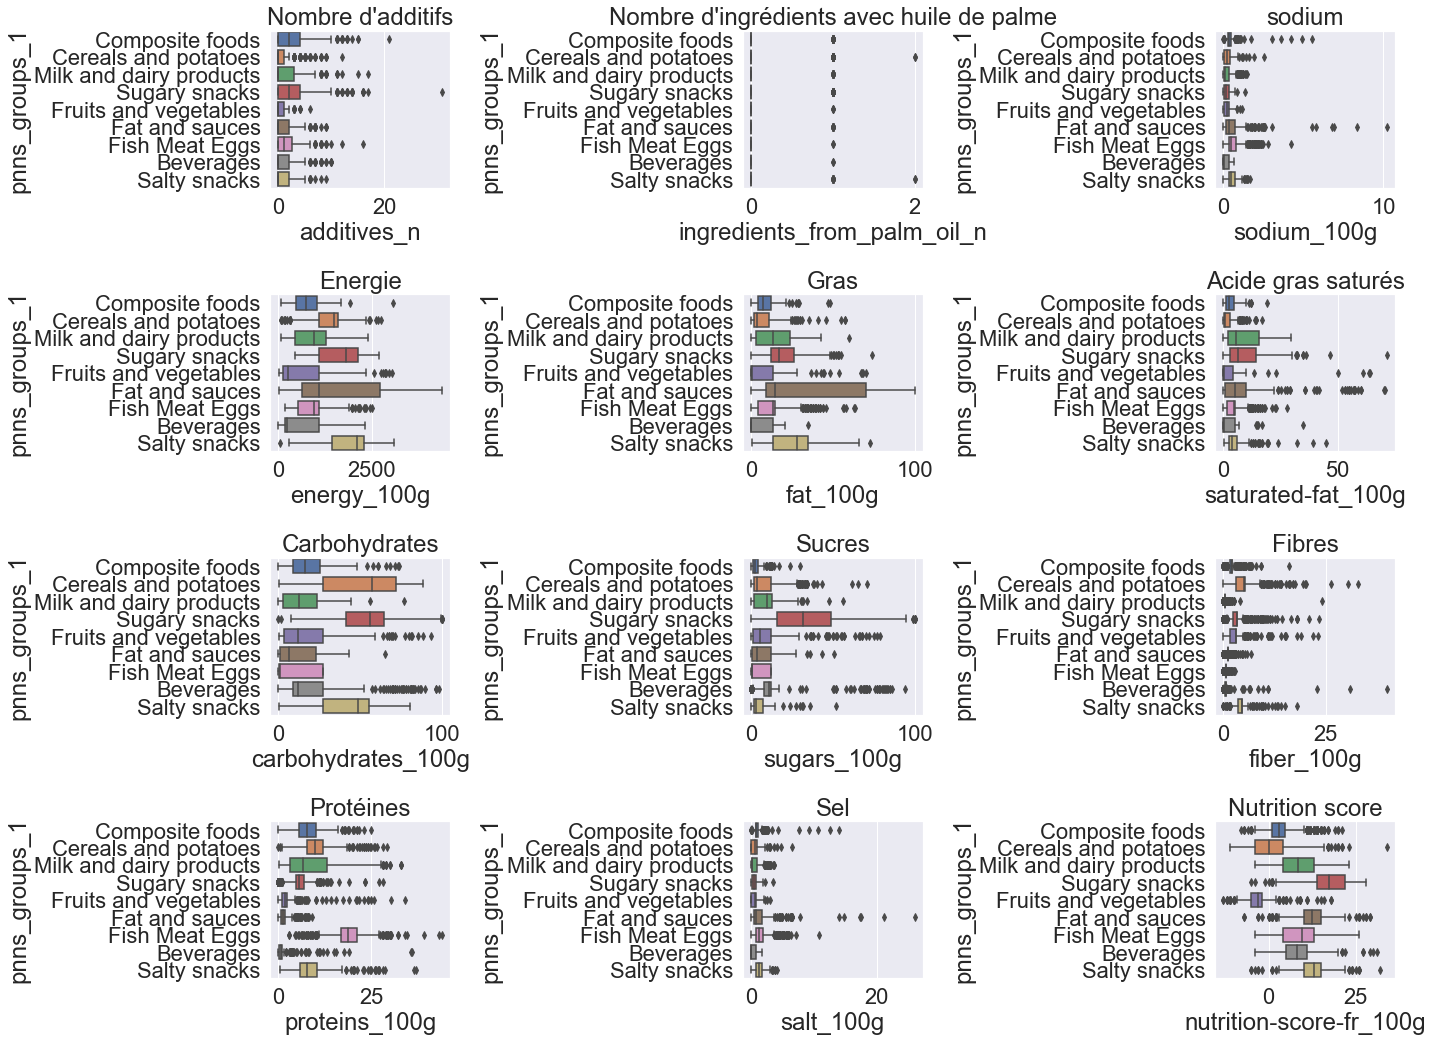

In [24]:
fig,axs=plt.subplots(4,3,tight_layout=True,figsize=(20,15))
sns.boxplot(ax=axs[0,0],data=data1,x=data1['additives_n'],y=data1['pnns_groups_1'])
axs[0,0].set_title("Nombre d'additifs")
sns.boxplot(ax=axs[0,1],data=data1,x=data1['ingredients_from_palm_oil_n'],y=data1['pnns_groups_1'])
axs[0,1].set_title("Nombre d'ingrédients avec huile de palme")
sns.boxplot(ax=axs[0,2],data=data1,x=data1['sodium_100g'],y=data1['pnns_groups_1'])
axs[0,2].set_title("sodium")
sns.boxplot(ax=axs[1,0],data=data1,x=data1['energy_100g'],y=data1['pnns_groups_1'])
axs[1,0].set_title("Energie")
sns.boxplot(ax=axs[1,1],data=data1,x=data1['fat_100g'],y=data1['pnns_groups_1'])
axs[1,1].set_title("Gras")
sns.boxplot(ax=axs[1,2],data=data1,x=data1['saturated-fat_100g'],y=data1['pnns_groups_1'])
axs[1,2].set_title("Acide gras saturés")
sns.boxplot(ax=axs[2,0],data=data1,x=data1['carbohydrates_100g'],y=data1['pnns_groups_1'])
axs[2,0].set_title("Carbohydrates")
sns.boxplot(ax=axs[2,1],data=data1,x=data1['sugars_100g'],y=data1['pnns_groups_1'])
axs[2,1].set_title("Sucres")
sns.boxplot(ax=axs[2,2],data=data1,x=data1['fiber_100g'],y=data1['pnns_groups_1'])
axs[2,2].set_title("Fibres")
sns.boxplot(ax=axs[3,0],data=data1,x=data1['proteins_100g'],y=data1['pnns_groups_1'])
axs[3,0].set_title("Protéines")
sns.boxplot(ax=axs[3,1],data=data1,x=data1['salt_100g'],y=data1['pnns_groups_1'])
axs[3,1].set_title("Sel")
sns.boxplot(ax=axs[3,2],data=data1,x=data1['nutrition-score-fr_100g'],y=data1['pnns_groups_1'])
axs[3,2].set_title("Nutrition score")

In [25]:
nutritional_composition = ['fat_100g','saturated-fat_100g' ,
                           'carbohydrates_100g', 'sugars_100g',
                           'proteins_100g','salt_100g','energy_100g', 'sodium_100g','fiber_100g']


pnns_groups_1_values = ['Cereals and potatoes', 'Fruits and vegetables',
                        'Milk and dairy products', 'Fish Meat Eggs','Fat and sauces',
                        'Sugary snacks', 'Salty snacks','Composite foods', 
                        'Beverages', 'Alcoholic beverages']


In [26]:
data1.columns

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'product_name', 'code',
       'product_name.1', 'additives_n', 'ingredients_from_palm_oil_n',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2'],
      dtype='object')

In [27]:
def plot_feature_density_for_groups(df, features, group_column, group_values = [], xlim=None, xlabel = None, figsize = None,
                                   name = '', savefigure = False) :
    X = df[features].copy()
    X["group"] = df[group_column].copy()
    groups = group_values if len(group_values) else X.group.unique()
        
    for col in features :
        fig, ax = plt.subplots(figsize = figsize)
        for cat in groups :
            sns.kdeplot(X.loc[X.group == cat, col], shade=False, label=cat)
        plt.xlabel(xlabel)
        ax.set_xlim(xlim)
        plt.title(col)
        plt.legend()
       

In [28]:
features = nutritional_composition 
X = data1[features].copy()

In [29]:
group_column = 'pnns_groups_1'
group_values = pnns_groups_1_values
X[group_column] = data1.loc[X.index, group_column].copy()

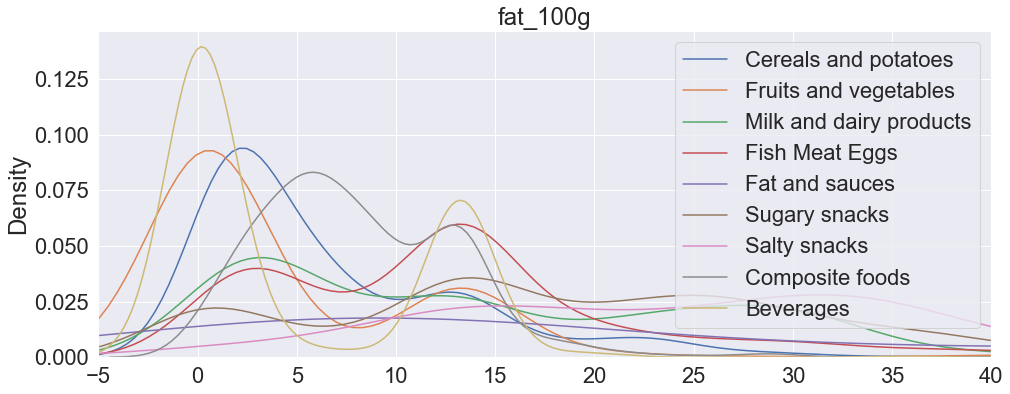

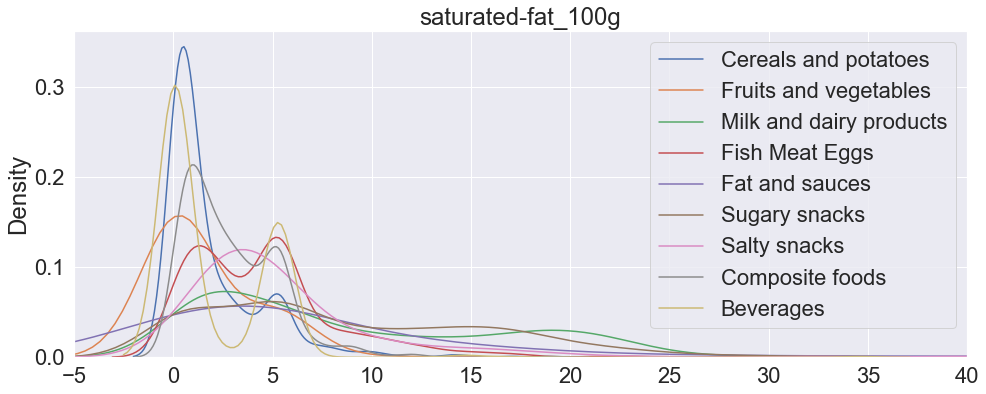

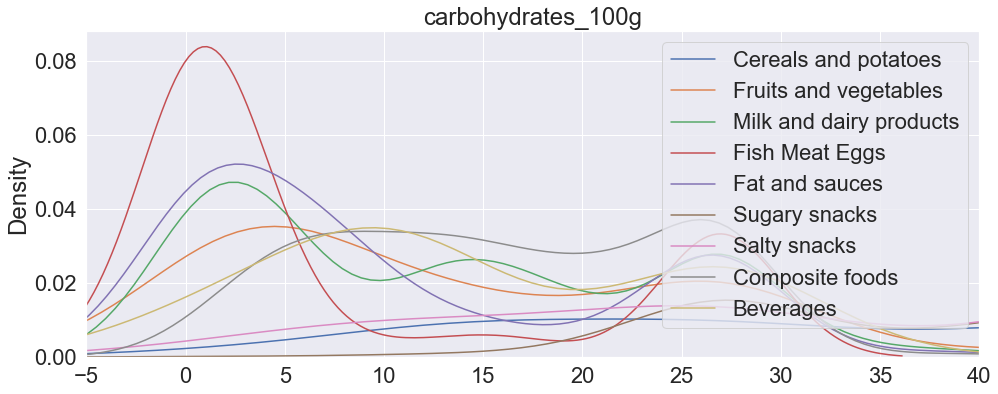

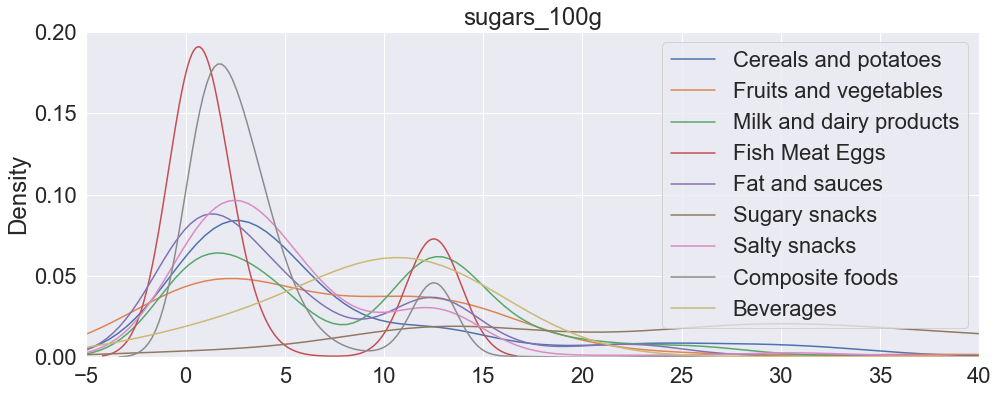

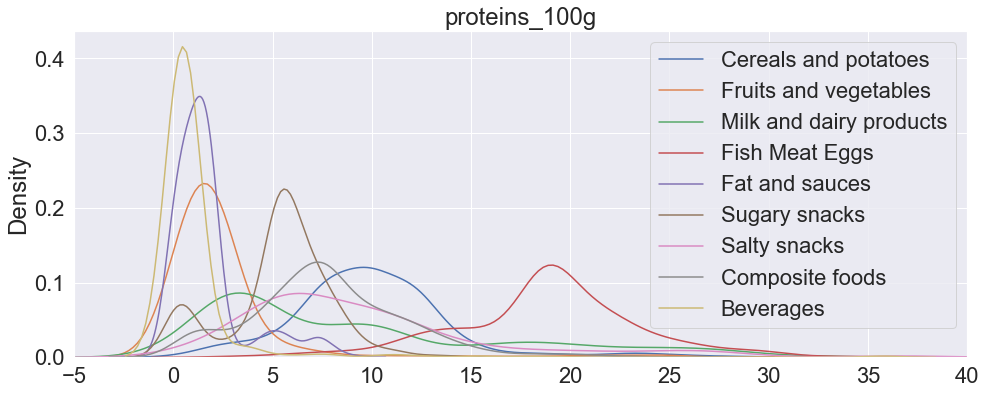

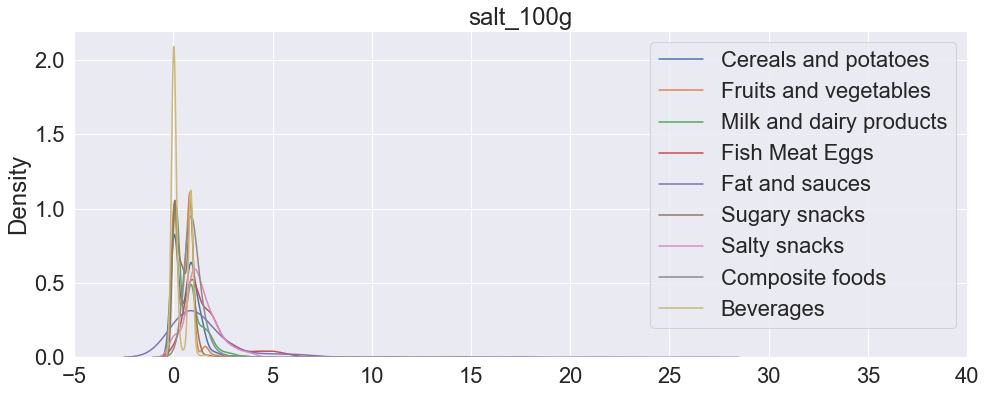

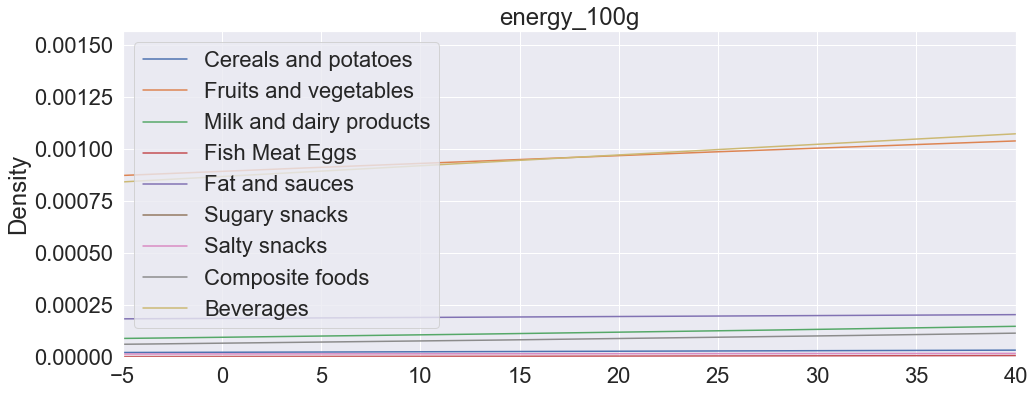

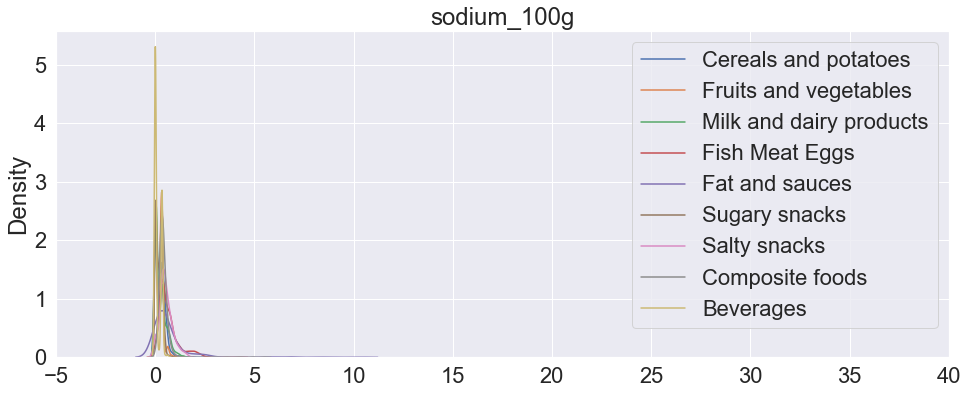

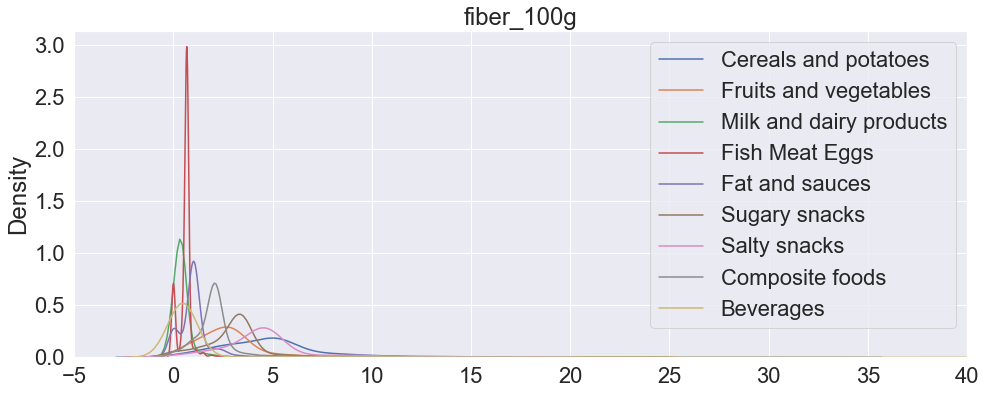

In [30]:
plot_feature_density_for_groups(X,features,group_column, group_values, figsize = (16,6), 
                                name = group_column, xlim = (-5,40))

## ACP : Analyse en Composantes Principales

### On commence par filtrer le dataframe et on ne garde que les variables numériques

In [31]:
data_ACP = data.select_dtypes('float')
data_ACP.shape

(48796, 12)

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection


In [33]:
sns.set()

In [34]:
X= data_ACP.values
X[0:5]


array([[1.08708569e+03, 1.32412330e+01, 5.27928318e+00, 2.69576132e+01,
        1.25109045e+01, 5.15742727e+00, 9.92830508e+00, 8.75458148e-01,
        3.44669761e-01, 1.24737285e+00, 0.00000000e+00, 0.00000000e+00],
       [1.08708569e+03, 1.32412330e+01, 5.27928318e+00, 2.69576132e+01,
        1.25109045e+01, 3.37166449e+00, 5.40229048e+00, 8.75458148e-01,
        3.44669761e-01, 1.74267489e+01, 3.00000000e+00, 0.00000000e+00],
       [1.08708569e+03, 1.32412330e+01, 5.27928318e+00, 2.69576132e+01,
        1.25109045e+01, 3.37166449e+00, 5.40229048e+00, 8.75458148e-01,
        3.44669761e-01, 1.74267489e+01, 0.00000000e+00, 0.00000000e+00],
       [1.08708569e+03, 1.32412330e+01, 5.27928318e+00, 2.69576132e+01,
        1.25109045e+01, 5.79940693e-01, 8.45284313e-01, 8.75458148e-01,
        3.44669761e-01, 8.14558646e+00, 0.00000000e+00, 0.00000000e+00],
       [1.77000000e+02, 0.00000000e+00, 0.00000000e+00, 1.04000000e+01,
        1.04000000e+01, 0.00000000e+00, 0.00000000e+00, 2.54

In [35]:
features = data_ACP.columns
features

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition-score-fr_100g', 'additives_n',
       'ingredients_from_palm_oil_n'],
      dtype='object')

### On commence par scaler les données ( les centrer et les réduire pour que la moyenne soit de 0 et l'écart type de 1).
PCA fonctionne sur des données standariser.

In [36]:
scaler = StandardScaler()

In [37]:
scaler.fit(X)

StandardScaler()

In [38]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.02383202, -0.01943624, -0.01335291, -0.00246795, -0.00200006,
         1.02765649,  0.29999786, -0.00831404, -0.00831347, -0.8355319 ,
        -0.6593369 , -0.24213615],
       [-0.02383202, -0.01943624, -0.01335291, -0.00246795, -0.00200006,
         0.39971833, -0.32835984, -0.00831404, -0.00831347,  1.07974391,
         0.53412705, -0.24213615],
       [-0.02383202, -0.01943624, -0.01335291, -0.00246795, -0.00200006,
         0.39971833, -0.32835984, -0.00831404, -0.00831347,  1.07974391,
        -0.6593369 , -0.24213615],
       [-0.02383202, -0.01943624, -0.01335291, -0.00246795, -0.00200006,
        -0.58195175, -0.96102016, -0.00831404, -0.00831347, -0.01893788,
        -0.6593369 , -0.24213615],
       [-1.29803794, -0.87366648, -0.72298879, -0.68496476, -0.13152481,
        -0.78587967, -1.07837306, -0.67332836, -0.67328142,  0.55571597,
         0.13630573, -0.24213615]])

### On vérifie pour chaque colonne que la moyenne est 0 et l'écart type 1

In [39]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9    10   11
mean  0.0  0.0  0.0 -0.0 -0.0 -0.0 -0.0 -0.0 -0.0  0.0  0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [40]:
# on prend seulement 6 composante
n_components =6

In [41]:
pca = PCA(n_components=6)

In [42]:
pca.fit(X_scaled)

PCA(n_components=6)

In [43]:
#préserver la variance
pca.explained_variance_ratio_

array([0.26758572, 0.20968079, 0.133444  , 0.10529517, 0.08317078,
       0.06208665])

### La première composante capte presque 27% de la variance de nos données initiales, la 2ème 20%, la 3ème 13%, la 4ème 10% etc...

In [44]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([26.76, 20.97, 13.34, 10.53,  8.32,  6.21])

### Les 2 premières composantes captent donc 26+20 = 46% de la variance, les 3 premières 26+20+13 =59 % de la variance, les 4 premières 27+16+14+10= 66% de la variance etc...  On peut faire une somme commulé

In [45]:
scree_cum = scree.cumsum().round()
scree_cum

array([27., 48., 61., 72., 80., 86.])

### Eboulis des valeurs propres

In [46]:
x_list = range(0, 6)
list(x_list)

[0, 1, 2, 3, 4, 5]

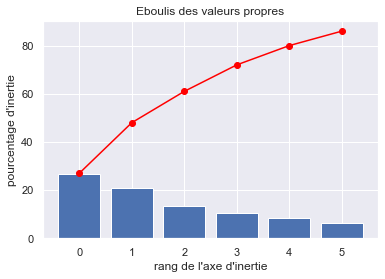

In [47]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### En bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.On voit ici qu'environ 60% de la variance est comprise dans les 3 premières composantes, et qu'environ 70% dans les 4 premières.

In [48]:
pcs = pca.components_
pcs

array([[ 0.50763068,  0.44097229,  0.41709803,  0.2257697 ,  0.23726105,
         0.09114633,  0.07710913,  0.07295999,  0.07296107,  0.44406744,
         0.07571702,  0.19695201],
       [-0.04353124,  0.13905297,  0.11291235, -0.36958344, -0.37529236,
        -0.15893375,  0.32217457,  0.52059539,  0.52058615,  0.05648713,
        -0.04295933, -0.11163176],
       [-0.08233552, -0.35674393, -0.33845254,  0.39537395,  0.30753587,
         0.14791553, -0.00738573,  0.39171466,  0.39172336,  0.08121589,
         0.32879092,  0.23871538],
       [ 0.2055521 , -0.0063288 , -0.09073663,  0.24986592, -0.05119693,
         0.64960478,  0.31328099,  0.05832831,  0.05833073, -0.25474428,
        -0.47571647, -0.25745722],
       [-0.02556898, -0.05414206, -0.00675685,  0.13815306,  0.38772129,
        -0.35950557, -0.3156765 ,  0.14949611,  0.14951074,  0.2118982 ,
        -0.45806093, -0.546476  ],
       [ 0.00944955,  0.17234383,  0.05367205, -0.10295748, -0.16311206,
         0.24146407, -

In [49]:
pcs = pd.DataFrame(pcs)
pcs

0         1         2         3         4         5         6   \
0  0.507631  0.440972  0.417098  0.225770  0.237261  0.091146  0.077109   
1 -0.043531  0.139053  0.112912 -0.369583 -0.375292 -0.158934  0.322175   
2 -0.082336 -0.356744 -0.338453  0.395374  0.307536  0.147916 -0.007386   
3  0.205552 -0.006329 -0.090737  0.249866 -0.051197  0.649605  0.313281   
4 -0.025569 -0.054142 -0.006757  0.138153  0.387721 -0.359506 -0.315677   
5  0.009450  0.172344  0.053672 -0.102957 -0.163112  0.241464 -0.753308   

         7         8         9         10        11  
0  0.072960  0.072961  0.444067  0.075717  0.196952  
1  0.520595  0.520586  0.056487 -0.042959 -0.111632  
2  0.391715  0.391723  0.081216  0.328791  0.238715  
3  0.058328  0.058331 -0.254744 -0.475716 -0.257457  
4  0.149496  0.149511  0.211898 -0.458061 -0.546476  
5  0.184581  0.184602 -0.188855 -0.261623  0.363434

In [50]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  \
F0         0.51      0.44                0.42                0.23   
F1        -0.04      0.14                0.11               -0.37   
F2        -0.08     -0.36               -0.34                0.40   
F3         0.21     -0.01               -0.09                0.25   
F4        -0.03     -0.05               -0.01                0.14   
F5         0.01      0.17                0.05               -0.10   

    sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
F0         0.24        0.09           0.08       0.07         0.07   
F1        -0.38       -0.16           0.32       0.52         0.52   
F2         0.31        0.15          -0.01       0.39         0.39   
F3        -0.05        0.65           0.31       0.06         0.06   
F4         0.39       -0.36          -0.32       0.15         0.15   
F5        -0.16        0.24          -0.75       0.18         0.18   

    nutrition-score-fr_100g  additives_n  ingredients_from_palm_oil_n  
F0                     0.44         0.08                         0.20  
F1                     0.06        -0.04                        -0.11  
F2                     0.08         0.33                         0.24  
F3                    -0.25        -0.48                        -0.26  
F4                     0.21        -0.46                        -0.55  
F5                    -0.19        -0.26                         0.36

#### Calcul des composantes principales:
* F1= (0.51*energy_100g) + (0.44fat_100g)+ ....+ (0.17*ingredients_from_palm_oil_n)
* F2= (0.01*energy_100g) + (0.15*fat_100g)+ ....+ (-0.06*ingredients_from_palm_oil_n) 
** etc...

In [51]:
pcs.T

F0        F1        F2        F3        F4  \
energy_100g                  0.507631 -0.043531 -0.082336  0.205552 -0.025569   
fat_100g                     0.440972  0.139053 -0.356744 -0.006329 -0.054142   
saturated-fat_100g           0.417098  0.112912 -0.338453 -0.090737 -0.006757   
carbohydrates_100g           0.225770 -0.369583  0.395374  0.249866  0.138153   
sugars_100g                  0.237261 -0.375292  0.307536 -0.051197  0.387721   
fiber_100g                   0.091146 -0.158934  0.147916  0.649605 -0.359506   
proteins_100g                0.077109  0.322175 -0.007386  0.313281 -0.315677   
salt_100g                    0.072960  0.520595  0.391715  0.058328  0.149496   
sodium_100g                  0.072961  0.520586  0.391723  0.058331  0.149511   
nutrition-score-fr_100g      0.444067  0.056487  0.081216 -0.254744  0.211898   
additives_n                  0.075717 -0.042959  0.328791 -0.475716 -0.458061   
ingredients_from_palm_oil_n  0.196952 -0.111632  0.238715 -0.257457 -0.546476   

                                   F5  
energy_100g                  0.009450  
fat_100g                     0.172344  
saturated-fat_100g           0.053672  
carbohydrates_100g          -0.102957  
sugars_100g                 -0.163112  
fiber_100g                   0.241464  
proteins_100g               -0.753308  
salt_100g                    0.184581  
sodium_100g                  0.184602  
nutrition-score-fr_100g     -0.188855  
additives_n                 -0.261623  
ingredients_from_palm_oil_n  0.363434

<AxesSubplot:>

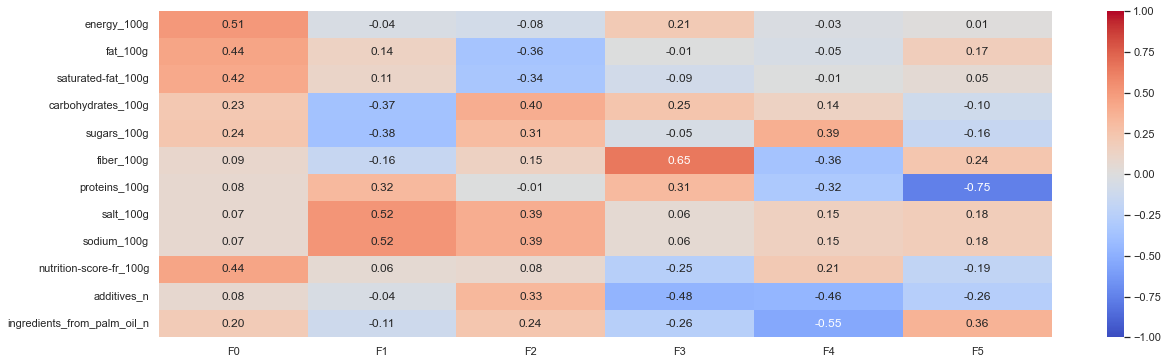

In [52]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

###  cercle des corrélations

In [53]:
x, y = 0,1

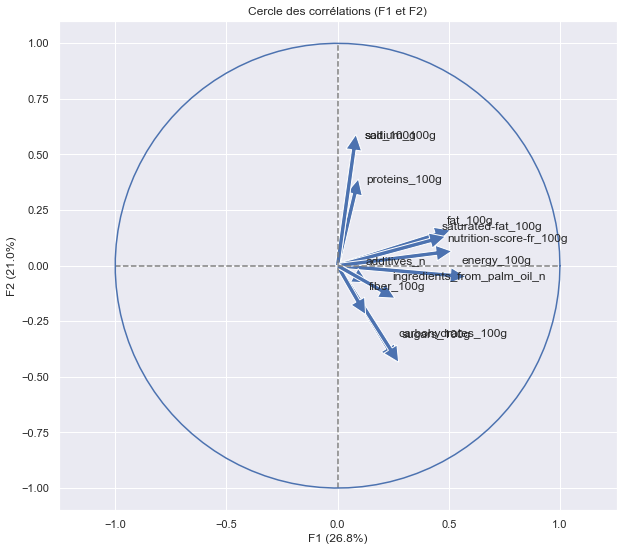

In [54]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [55]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))
# Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')
    
    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

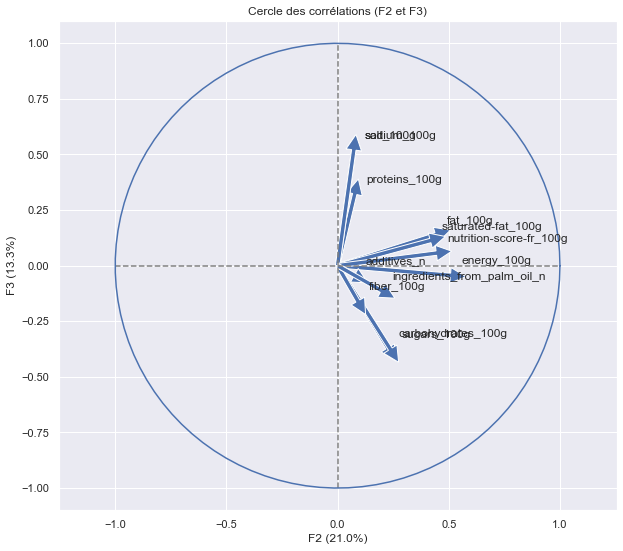

In [56]:
correlation_graph(pca, (1,2), features)

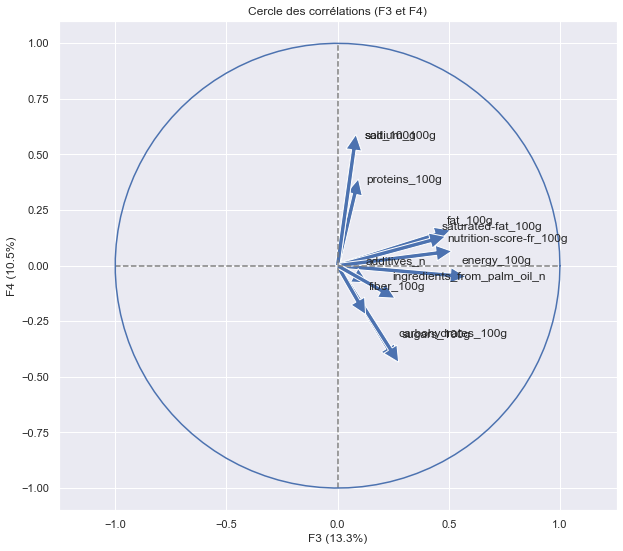

In [57]:
correlation_graph(pca, (2,3), features)

## Test de normalité (Kolmogorov-Smirnov)

In [58]:
from scipy import stats

In [59]:
data3 = data.select_dtypes(float)
data3.head(2)

energy_100g   fat_100g  saturated-fat_100g  carbohydrates_100g  \
0  1087.085688  13.241233            5.279283           26.957613   
1  1087.085688  13.241233            5.279283           26.957613   

   sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  \
0    12.510905    5.157427       9.928305   0.875458      0.34467   
1    12.510905    3.371664       5.402290   0.875458      0.34467   

   nutrition-score-fr_100g  additives_n  ingredients_from_palm_oil_n  
0                 1.247373          0.0                          0.0  
1                17.426749          3.0                          0.0

In [60]:
alpha= 0.05
print('===================\nnull hypothesis : studied feature follow a normal distribution.\n ===================\n\n')

for i in range(len(data3.columns)): 
    
    D, pval = stats.kstest(data3[data3.columns[i]], 'norm')
    print('D= {}\nP-value= {}'.format(D,pval))
    if pval<alpha: 
        print('P-value is lower than alpha ({}) we can reject the null hypothesis\n => {} does not follow normal distribution'
              .format(alpha,data3.columns[i]))
    else : 
        print('We cannot reject the null hypothesis')
    print('----------------\n')
    

null hypothesis : studied feature follow a normal distribution.


D= 0.9956032168637493
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => energy_100g does not follow normal distribution
----------------

D= 0.7388491794707895
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => fat_100g does not follow normal distribution
----------------

D= 0.5771732139635559
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => saturated-fat_100g does not follow normal distribution
----------------

D= 0.835990512276076
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => carbohydrates_100g does not follow normal distribution
----------------

D= 0.6971216236416586
P-value= 0.0
P-value is lower than alpha (0.05) we can reject the null hypothesis
 => sugars_100g does not follow normal distribution
----------------

D= 0.537420266079543
P-value= 0.0
P-value is lower tha

## Test statistiques

## Test Anova
### Est ce que la catégorie de l'aliment(pnns_groups_1) a une influence sur le nutrition-score-fr_100g ?
### H0 (Hypothèse nulle) : Il n y a pas de corrélation entre la catégorie de l'aliment et le nutrition-score-fr_100g
### H1(Hypothèse alternative) : la catégorie de l'aliment influence la valeur du nutrition-score-fr_100g

Text(0.5, 1.0, 'Nutrition score')

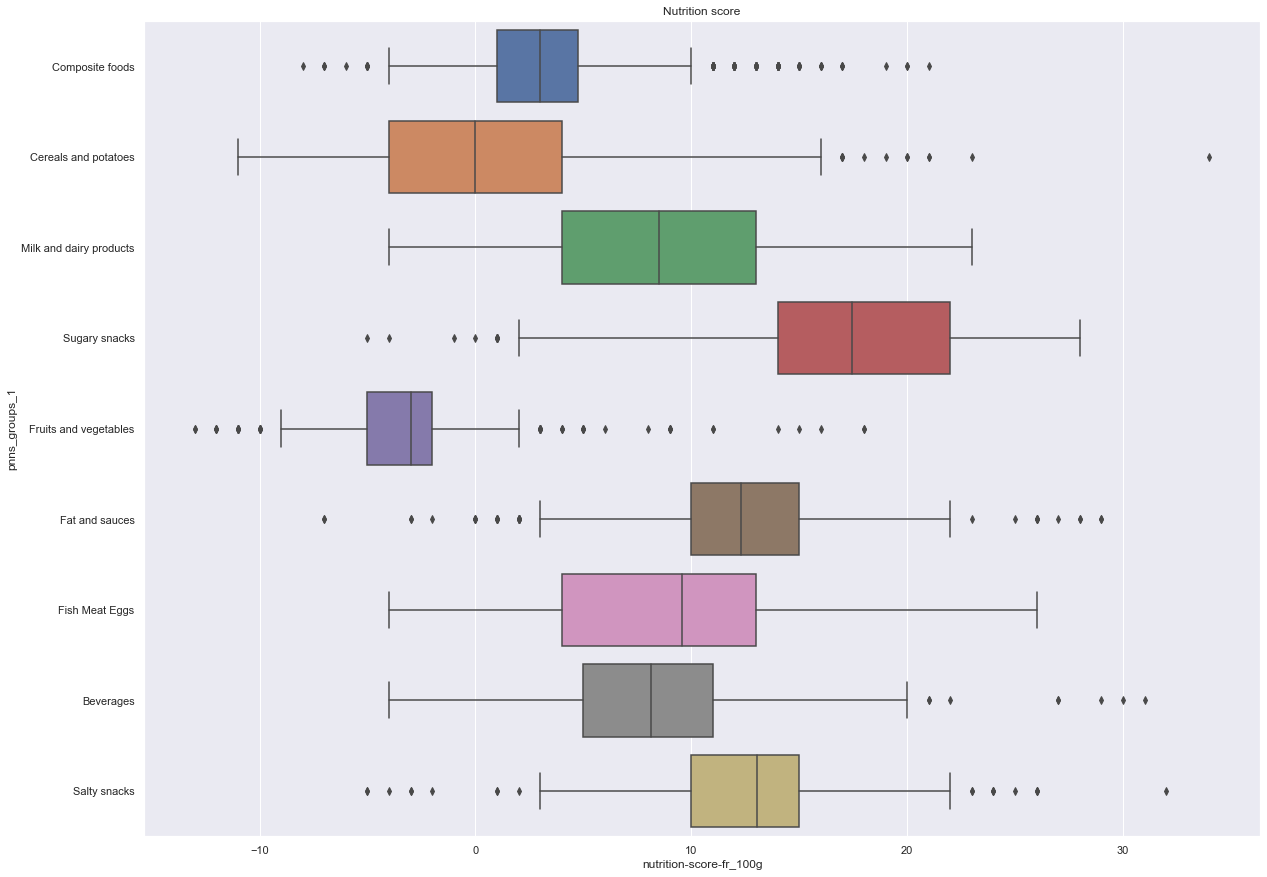

In [61]:
fig,ax= plt.subplots(figsize=(20,15))
sns.boxplot(data=data1,x=data1['nutrition-score-fr_100g'],y=data1['pnns_groups_1'])
ax.set_title("Nutrition score")

In [62]:
data['pnns_groups_1'].unique()

array(['Cereals and potatoes', 'Sugary snacks', 'Beverages',
       'Fish Meat Eggs', 'Fruits and vegetables', 'Composite foods',
       'Salty snacks', 'Fat and sauces', 'Milk and dairy products'],
      dtype=object)

### Test ANOVA

In [63]:
F, p = stats.f_oneway(
   
    data[data['pnns_groups_1'] == 'Cereals and potatoes']['nutrition-score-fr_100g'], 
    data[data['pnns_groups_1'] == 'Sugary snacks']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Beverages']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Fish Meat Eggs']['nutrition-score-fr_100g'], 
    data[data['pnns_groups_1'] == 'Fruits and vegetables']['nutrition-score-fr_100g'], 
    data[data['pnns_groups_1'] == 'Composite foods']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Salty snacks']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Fat and sauces']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Milk and dairy products']['nutrition-score-fr_100g'])
F, p


(6857.542085142135, 0.0)

In [64]:
F, p = stats.kruskal(
   
    data[data['pnns_groups_1'] == 'Cereals and potatoes']['nutrition-score-fr_100g'], 
    data[data['pnns_groups_1'] == 'Sugary snacks']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Beverages']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Fish Meat Eggs']['nutrition-score-fr_100g'], 
    data[data['pnns_groups_1'] == 'Fruits and vegetables']['nutrition-score-fr_100g'], 
    data[data['pnns_groups_1'] == 'Composite foods']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Salty snacks']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Fat and sauces']['nutrition-score-fr_100g'],
    data[data['pnns_groups_1'] == 'Milk and dairy products']['nutrition-score-fr_100g'])
F, p

(26036.96043698081, 0.0)

### Avec le test oneway , on a une p-value de zéro , on rejette donc H0.
### On en conclut donc que la catégorie d'aliments a une influence sur la valeur du nutrition-score-fr_100g


### Test de khi-deux

In [65]:
X = "nutrition_grade_fr"
Y = "pnns_groups_1"
con = data1[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len).fillna(0).copy().astype(int)
con

pnns_groups_1       Beverages  Cereals and potatoes  Composite foods  \
nutrition_grade_fr                                                     
a                          21                   259              107   
b                          41                    94              166   
c                          98                   104              140   
d                          53                    58               93   
e                         161                     7                4   

pnns_groups_1       Fat and sauces  Fish Meat Eggs  Fruits and vegetables  \
nutrition_grade_fr                                                          
a                                5              45                    212   
b                               19              60                     60   
c                               65             135                     22   
d                              134             154                      7   
e                               54              90                      0   

pnns_groups_1       Milk and dairy products  Salty snacks  Sugary snacks  
nutrition_grade_fr                                                        
a                                        31             6              3  
b                                        84             3             21  
c                                       163            49             73  
d                                       215            85            273  
e                                        18            21            372

* La catégories de produit est indépendante de nutriscore grade

In [66]:

st_chi2, st_p, st_dof, st_exp = stats.chi2_contingency(con)
st_chi2,st_p

(2518.13621716013, 0.0)

Text(0.5, 1.0, 'Nutrition grade')

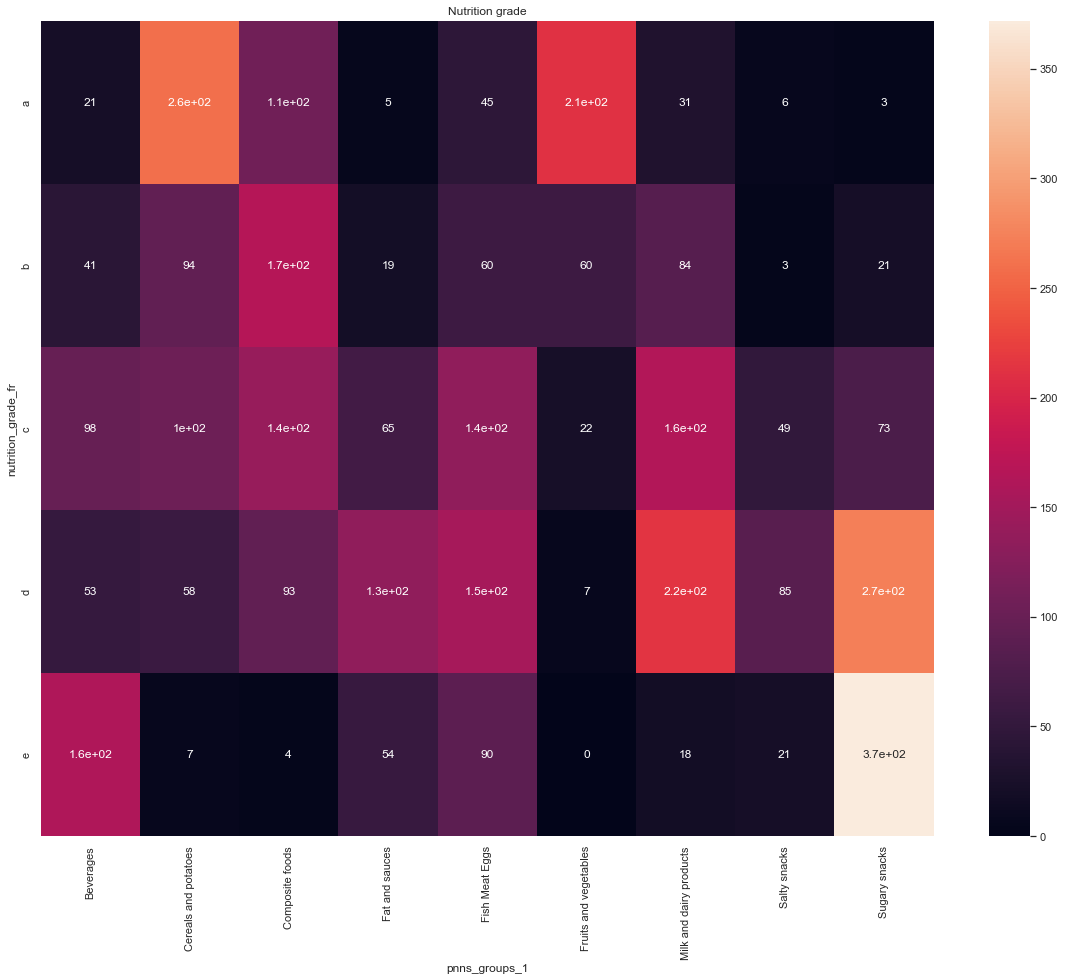

In [67]:
fig,ax= plt.subplots(figsize=(20,15))
sns.heatmap(con , annot= True)
ax.set_title("Nutrition grade")